**LAB : 06**

Advanced Data Wrangling and Transformation

OBJECTIVES:
-to learn data wrangling and transformation

THEORY:

Data wrangling (data munging) is the process of transforming raw, messy, incomplete, or inconsistent data into a clean and structured format suitable for analysis.
    Purpose of data wrangling:
        Improve data quality
        Make data analysis-ready
        Integrate multiple data sources
        Reduce errors in models
In real-world scenarios, data collected from different sources is often incomplete, inconsistent, and noisy. Before performing analysis or building machine learning models, the data must be cleaned and transformed. This lab focused on practical implementation of various data preprocessing techniques such as handling missing values, removing duplicates, normalization, and restructuring datasets.

In [ ]:
import pandas as pd

In [91]:
sales_data = {
    "transaction_id": ["TX001", "TX002", "TX003", "TX004", "TX005"],
    "customer_id": ["CUST101", "CUST102", "CUST103", "CUST101", "CUST104"],
    "product_id": ["PROD201", "PROD202", "PROD201", "PROD203", "PROD204"],
    "store_id": ["ST01", "ST02", "ST01", "ST03", "ST02"],
    "quantity": [3, 1, 2, 5, 1],
    "sale_date": ["2024-01-15", "2024-01-15", "2024-01-16", "2024-01-16", "2024-01-17"]
}

sales_df = pd.DataFrame(sales_data)

sales_df.to_csv("sales_transactions.csv", index=False)

print("sales_transactions.csv created successfully!")

sales_transactions.csv created successfully!


In [92]:
customers_data = {
    "customer_id": ["CUST101", "CUST102", "CUST105"],
    "name": ["Alice Brown", "Bob Smith", "Carol White"],
    "email": ["alice@email.com", "bob@email.com", "carol@email.com"],
    "city": ["New York", "London", "Tokyo"],
    "country": ["USA", "UK", "Japan"],
    "join_date": ["2023-03-15", "2023-05-20", "2023-07-10"],
    "loyalty_tier": ["Gold", "Silver", "Gold"]
}

customers_df = pd.DataFrame(customers_data)

customers_df.to_csv("customers.csv", index=False)

print("customers.csv created successfully!")

customers.csv created successfully!


In [93]:
products_data = {
    "product_id": ["PROD201", "PROD202", "PROD203", "PROD205"],
    "product_name": ["Laptop", "Coffee Maker", "Office Chair", "Headphones"],
    "category": ["Electronics", "Appliances", "Furniture", "Electronics"],
    "unit_price": [1200.00, 89.99, 250.00, 150.00],
    "supplier_id": ["SUP01", "SUP02", "SUP01", "SUP03"],
    "stock_qty": [50, 100, 75, 200]
}

products_df = pd.DataFrame(products_data)

products_df.to_csv("products.csv", index=False)

print("products.csv created successfully!")

products.csv created successfully!


In [ ]:

import pandas as pd


sales_df = pd.read_csv("sales_transactions.csv")
customers_df = pd.read_csv("customers.csv")
products_df = pd.read_csv("products.csv")


sales_customers = pd.merge(sales_df, customers_df,
                           on="customer_id",
                           how="left")

# ii. Merge with products (keep all transactions)
full_data = pd.merge(sales_customers, products_df,
                     on="product_id",
                     how="left")

# iii. Find transactions with missing product info
missing_products = full_data[full_data["product_name"].isna()]
print("Missing Product Info:\n", missing_products)

# iv. Calculate revenue
full_data["revenue"] = full_data["quantity"] * full_data["unit_price"]

# Group revenue by loyalty tier
revenue_per_segment = full_data.groupby("loyalty_tier")["revenue"].sum()

print("\nRevenue per Loyalty Tier:\n", revenue_per_segment)

Missing Product Info:
   transaction_id customer_id product_id store_id  quantity   sale_date name  \
4          TX005     CUST104    PROD204     ST02         1  2024-01-17  NaN   

  email city country join_date loyalty_tier product_name category  unit_price  \
4   NaN  NaN     NaN       NaN          NaN          NaN      NaN         NaN   

  supplier_id  stock_qty  
4         NaN        NaN  

Revenue per Loyalty Tier:
 loyalty_tier
Gold      4850.00
Silver      89.99
Name: revenue, dtype: float64


In [ ]:

import pandas as pd

# Assume full_data is the merged dataframe

# a. Identify duplicate transaction IDs
duplicate_ids = full_data[full_data.duplicated("transaction_id", keep=False)]
print("Duplicate Transaction IDs:\n", duplicate_ids)


# b. Check if duplicates are exact copies
exact_duplicates = full_data[full_data.duplicated(keep=False)]
print("\nExact Duplicate Rows:\n", exact_duplicates)


# Find duplicates with same ID but different values
non_exact_duplicates = duplicate_ids.drop_duplicates()
print("\nDuplicates with Different Values:\n", non_exact_duplicates)


# c. Strategy: Keep first occurrence and remove others
cleaned_data = full_data.drop_duplicates(subset="transaction_id", keep="first")

print("\nData after removing duplicate transaction IDs:\n", cleaned_data)

Duplicate Transaction IDs:
 Empty DataFrame
Columns: [transaction_id, customer_id, product_id, store_id, quantity, sale_date, name, email, city, country, join_date, loyalty_tier, product_name, category, unit_price, supplier_id, stock_qty, revenue]
Index: []

Exact Duplicate Rows:
 Empty DataFrame
Columns: [transaction_id, customer_id, product_id, store_id, quantity, sale_date, name, email, city, country, join_date, loyalty_tier, product_name, category, unit_price, supplier_id, stock_qty, revenue]
Index: []

Duplicates with Different Values:
 Empty DataFrame
Columns: [transaction_id, customer_id, product_id, store_id, quantity, sale_date, name, email, city, country, join_date, loyalty_tier, product_name, category, unit_price, supplier_id, stock_qty, revenue]
Index: []

Data after removing duplicate transaction IDs:
   transaction_id customer_id product_id store_id  quantity   sale_date  \
0          TX001     CUST101    PROD201     ST01         3  2024-01-15   
1          TX002     CUST

In [ ]:

import pandas as pd


data = {
    "date": ["2024-01-01","2024-01-01","2024-01-01","2024-01-01",
             "2024-01-02","2024-01-02","2024-01-02","2024-01-02"],
    "store_id": ["S01","S01","S02","S02","S01","S01","S02","S03"],
    "region": ["North","North","South","South","North","North","South","East"],
    "product_category": ["Electronics","Clothing","Electronics","Furniture",
                         "Electronics","Clothing","Electronics","Clothing"],
    "sales_amount": [15000,8000,12000,5000,18000,9500,13500,7000],
    "units_sold": [25,120,20,10,30,135,22,95]
}

df = pd.DataFrame(data)

pivot_sales = df.pivot_table(values="sales_amount",
                             index="region",
                             columns="product_category",
                             aggfunc="sum")
print(pivot_sales)

pivot_multi = df.pivot_table(values=["sales_amount","units_sold"],
                             index=["date","region"],
                             columns="product_category",
                             aggfunc="sum")
print(pivot_multi)

pivot_multiple = df.pivot_table(values="sales_amount",
                                index="region",
                                columns="product_category",
                                aggfunc="sum")
print(pivot_multiple)

product_category  Clothing  Electronics  Furniture
region                                            
East                7000.0          NaN        NaN
North              17500.0      33000.0        NaN
South                  NaN      25500.0     5000.0
                  sales_amount                       units_sold              \
product_category      Clothing Electronics Furniture   Clothing Electronics   
date       region                                                             
2024-01-01 North        8000.0     15000.0       NaN      120.0        25.0   
           South           NaN     12000.0    5000.0        NaN        20.0   
2024-01-02 East         7000.0         NaN       NaN       95.0         NaN   
           North        9500.0     18000.0       NaN      135.0        30.0   
           South           NaN     13500.0       NaN        NaN        22.0   

                             
product_category  Furniture  
date       region            
2024-01-01 North      

In [ ]:

import pandas as pd


data = {
    "date": ["2024-01-01","2024-01-01","2024-01-02","2024-01-02"],
    "region": ["North","South","North","South"],
    "sales_amount": [15000,12000,18000,13500],
    "units_sold": [25,20,30,22]
}

df = pd.DataFrame(data)


melted_df = df.melt(id_vars=["date","region"],
                    value_vars=["sales_amount","units_sold"],
                    var_name="metric",
                    value_name="value")

print(melted_df)

         date region        metric  value
0  2024-01-01  North  sales_amount  15000
1  2024-01-01  South  sales_amount  12000
2  2024-01-02  North  sales_amount  18000
3  2024-01-02  South  sales_amount  13500
4  2024-01-01  North    units_sold     25
5  2024-01-01  South    units_sold     20
6  2024-01-02  North    units_sold     30
7  2024-01-02  South    units_sold     22


In [ ]:

import pandas as pd

data = {
    "region": ["North","North","South","South","East"],
    "product_category": ["Electronics","Clothing","Electronics","Furniture","Clothing"],
    "sales_amount": [15000,8000,12000,5000,7000]
}

df = pd.DataFrame(data)

pivot_df = df.pivot_table(values="sales_amount",
                          index="region",
                          columns="product_category",
                          aggfunc="sum")


stacked = pivot_df.stack()
print("Stacked:\n", stacked)


unstacked = stacked.unstack()
print("\nUnstacked:\n", unstacked)

Stacked:
 region  product_category
East    Clothing             7000.0
North   Clothing             8000.0
        Electronics         15000.0
South   Electronics         12000.0
        Furniture            5000.0
dtype: float64

Unstacked:
 product_category  Clothing  Electronics  Furniture
region                                            
East                7000.0          NaN        NaN
North               8000.0      15000.0        NaN
South                  NaN      12000.0     5000.0


In [ ]:

crosstab_df = pd.crosstab(df["region"], df["product_category"])
print("\nCrosstab:\n", crosstab_df)


Crosstab:
 product_category  Clothing  Electronics  Furniture
region                                            
East                     1            0          0
North                    1            1          0
South                    0            1          1


In [ ]:

import pandas as pd

data = {
    "date": ["2024-01-01","2024-01-01","2024-01-02","2024-01-02","2024-01-02"],
    "region": ["North","South","North","South","East"],
    "store_id": ["S01","S02","S01","S02","S03"],
    "product_category": ["Electronics","Electronics","Clothing","Furniture","Clothing"],
    "sales_amount": [15000,12000,9500,5000,7000],
    "units_sold": [25,20,135,10,95]
}

df = pd.DataFrame(data)


multi_index_df = df.set_index(["date","region","store_id"])
print("Multi-index DataFrame:\n", multi_index_df)

sales_per_region = multi_index_df.groupby(level="region")["sales_amount"].sum()
print("\nTotal Sales per Region:\n", sales_per_region)

units_per_date = multi_index_df.groupby(level="date")["units_sold"].sum()
print("\nTotal Units per Date:\n", units_per_date)

north_sales = multi_index_df.xs("North", level="region")
print("\nNorth Region Sales:\n", north_sales)


reset_df = multi_index_df.reset_index()  
print("\nReset Multi-index:\n", reset_df)

reindexed_df = reset_df.set_index(["region","date","store_id"])
print("\nReindexed DataFrame:\n", reindexed_df)

Multi-index DataFrame:
                            product_category  sales_amount  units_sold
date       region store_id                                           
2024-01-01 North  S01           Electronics         15000          25
           South  S02           Electronics         12000          20
2024-01-02 North  S01              Clothing          9500         135
           South  S02             Furniture          5000          10
           East   S03              Clothing          7000          95

Total Sales per Region:
 region
East      7000
North    24500
South    17000
Name: sales_amount, dtype: int64

Total Units per Date:
 date
2024-01-01     45
2024-01-02    240
Name: units_sold, dtype: int64

North Region Sales:
                     product_category  sales_amount  units_sold
date       store_id                                           
2024-01-01 S01           Electronics         15000          25
2024-01-02 S01              Clothing          9500         135

Rese

In [ ]:

import pandas as pd
import numpy as np

data = {
    "region": ["North","North","South","South","East","East","North"],
    "category": ["Electronics","Clothing","Electronics","Furniture","Clothing","Electronics","Clothing"],
    "sales": [15000,8000,12000,5000,7000,9000,9500],
    "units": [25,120,20,10,95,15,135]
}

df = pd.DataFrame(data)

agg_df = df.groupby(["region","category"]).agg({
    "sales": ["sum","mean","std"],
    "units": ["sum","count"]
})
print("Basic Aggregation:\n", agg_df)

# a. Custom aggregation functions
def range_func(x):
    return x.max() - x.min()

custom_agg = df.groupby("region").agg({
    "sales": ["sum","mean", range_func],
    "units": ["sum", "count", lambda x: x.max()]
})
print("\nCustom Aggregation:\n", custom_agg)

agg_diff = df.groupby("category").agg({
    "sales": ["sum","mean"],
    "units": ["max","min"]
})
print("\nDifferent Functions per Column:\n", agg_diff)


df["sales_zscore"] = df.groupby("category")["sales"].transform(lambda x: (x - x.mean())/x.std())

total_sales = df.groupby("region")["sales"].apply(np.sum)

print("\nSales Z-score (transform):\n", df[["region","category","sales","sales_zscore"]])
print("\nTotal Sales per Region (apply):\n", total_sales)

filtered = df.groupby("region").filter(lambda x: x["sales"].sum() > 25000)
print("\nFiltered Groups (Total Sales > 25000):\n", filtered)

Basic Aggregation:
                     sales                       units      
                      sum     mean          std   sum count
region category                                            
East   Clothing      7000   7000.0          NaN    95     1
       Electronics   9000   9000.0          NaN    15     1
North  Clothing     17500   8750.0  1060.660172   255     2
       Electronics  15000  15000.0          NaN    25     1
South  Electronics  12000  12000.0          NaN    20     1
       Furniture     5000   5000.0          NaN    10     1

Custom Aggregation:
         sales                          units                 
          sum          mean range_func   sum count <lambda_0>
region                                                       
East    16000   8000.000000       2000   110     2         95
North   32500  10833.333333       7000   280     3        135
South   17000   8500.000000       7000    30     2         20

Different Functions per Column:
             

Percentage of Missing Values:
 patient_id         0.000000
age               33.333333
gender            16.666667
blood_pressure    33.333333
cholesterol       33.333333
diagnosis_date    16.666667
treatment_cost    33.333333
dtype: float64

Missing Data Patterns:
 {'age': 'MAR (depends on patient availability or recording)', 'gender': 'MCAR (random missing)', 'blood_pressure': 'MAR (missing if patient skipped checkup)', 'cholesterol': 'MAR (depends on lab test done)', 'diagnosis_date': 'MCAR (few missing, random)', 'treatment_cost': 'MNAR (likely missing if no treatment)'}


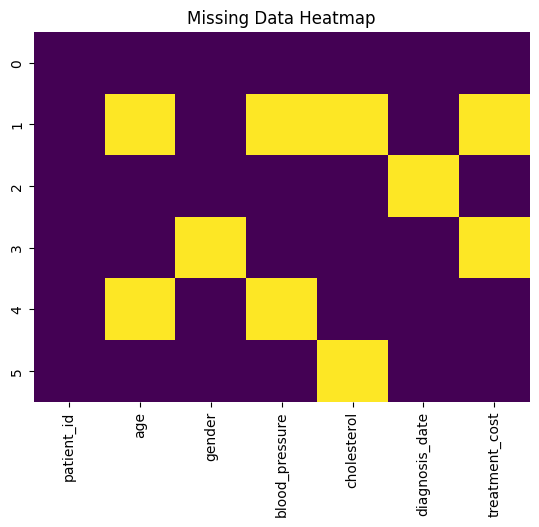


Columns to Impute: ['age', 'gender', 'blood_pressure', 'cholesterol', 'treatment_cost']
Columns to Drop: []


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = {
    "patient_id": ["P001","P002","P003","P004","P005","P006"],
    "age": [45,np.nan,62,38,np.nan,55],
    "gender": ["M","F","M",np.nan,"F","M"],
    "blood_pressure": ["120/80",np.nan,"140/90","110/70",np.nan,"135/85"],
    "cholesterol": [200,np.nan,240,180,220,np.nan],
    "diagnosis_date": ["2024-01-10","2024-01-11",np.nan,"2024-01-13","2024-01-14","2024-01-15"],
    "treatment_cost": [1500.0,np.nan,2300.0,np.nan,1800.0,2100.0]
}

df = pd.DataFrame(data)

missing_percent = df.isna().mean() * 100
print("Percentage of Missing Values:\n", missing_percent)

missing_patterns = {
    "age": "MAR (depends on patient availability or recording)",
    "gender": "MCAR (random missing)",
    "blood_pressure": "MAR (missing if patient skipped checkup)",
    "cholesterol": "MAR (depends on lab test done)",
    "diagnosis_date": "MCAR (few missing, random)",
    "treatment_cost": "MNAR (likely missing if no treatment)"
}
print("\nMissing Data Patterns:\n", missing_patterns)

sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

impute_cols = ["age","gender","blood_pressure","cholesterol","treatment_cost"]
drop_cols = [] 

print("\nColumns to Impute:", impute_cols)
print("Columns to Drop:", drop_cols)

In [ ]:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    "patient_id": ["P001","P002","P003","P004","P005","P006"],
    "age": [45,np.nan,62,38,np.nan,55],
    "gender": ["M","F","M",np.nan,"F","M"],
    "blood_pressure": ["120/80",np.nan,"140/90","110/70",np.nan,"135/85"],
    "cholesterol": [200,np.nan,240,180,220,np.nan],
    "diagnosis_date": ["2024-01-10","2024-01-11",np.nan,"2024-01-13","2024-01-14","2024-01-15"],
    "treatment_cost": [1500.0,np.nan,2300.0,np.nan,1800.0,2100.0]
}

df = pd.DataFrame(data)

df["age"].fillna(df["age"].mean(), inplace=True)        
df["cholesterol"].fillna(df["cholesterol"].median(), inplace=True)  
df["gender"].fillna(df["gender"].mode()[0], inplace=True)           

df["diagnosis_date"] = pd.to_datetime(df["diagnosis_date"])
df.sort_values("diagnosis_date", inplace=True)
df["treatment_cost"].fillna(method="ffill", inplace=True)  
df["blood_pressure"].fillna(method="bfill", inplace=True)  

df["treatment_cost"] = df["treatment_cost"].interpolate(method="linear")  
df["cholesterol"] = df["cholesterol"].interpolate(method="polynomial", order=2)  

train = df[df["age"].notna()]
test = df[df["age"].isna()]
if not test.empty:
    lr = LinearRegression()
    lr.fit(train[["cholesterol","treatment_cost"]], train["age"])
    df.loc[test.index, "age"] = lr.predict(test[["cholesterol","treatment_cost"]])

print("Data after imputation:\n", df)

Data after imputation:
   patient_id   age gender blood_pressure  cholesterol diagnosis_date  \
0       P001  45.0      M         120/80        200.0     2024-01-10   
1       P002  50.0      F         110/70        210.0     2024-01-11   
3       P004  38.0      M         110/70        180.0     2024-01-13   
4       P005  50.0      F         135/85        220.0     2024-01-14   
5       P006  55.0      M         135/85        210.0     2024-01-15   
2       P003  62.0      M         140/90        240.0            NaT   

   treatment_cost  
0          1500.0  
1          1500.0  
3          1500.0  
4          1800.0  
5          2100.0  
2          2300.0  


/tmp/ipython-input-3911212278.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace=True)        # mean
/tmp/ipython-input-3911212278.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:

import pandas as pd
import numpy as np

data = {
    "patient_id": ["P001","P002","P003","P004","P005","P006"],
    "age": [45,np.nan,62,38,np.nan,55],
    "gender": ["M","F","M",np.nan,"F","M"],
    "blood_pressure": ["120/80",np.nan,"140/90","110/70",np.nan,"135/85"],
    "cholesterol": [200,np.nan,240,180,220,np.nan],
    "diagnosis_date": ["2024-01-10","2024-01-11",np.nan,"2024-01-13","2024-01-14","2024-01-15"],
    "treatment_cost": [1500.0,np.nan,2300.0,np.nan,1800.0,2100.0]
}

df = pd.DataFrame(data)

for col in df.columns:
    df[col + "_missing"] = df[col].isna().astype(int)

print("Data with Missing Indicators:\n", df)

Data with Missing Indicators:
   patient_id   age gender blood_pressure  cholesterol diagnosis_date  \
0       P001  45.0      M         120/80        200.0     2024-01-10   
1       P002   NaN      F            NaN          NaN     2024-01-11   
2       P003  62.0      M         140/90        240.0            NaN   
3       P004  38.0    NaN         110/70        180.0     2024-01-13   
4       P005   NaN      F            NaN        220.0     2024-01-14   
5       P006  55.0      M         135/85          NaN     2024-01-15   

   treatment_cost  patient_id_missing  age_missing  gender_missing  \
0          1500.0                   0            0               0   
1             NaN                   0            1               0   
2          2300.0                   0            0               0   
3             NaN                   0            0               1   
4          1800.0                   0            1               0   
5          2100.0                   0       

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import category_encoders as ce  # for advanced encodings

data = {
    "customer_id": ["C001","C002","C003","C004","C005","C006"],
    "education_level": ["High School","Bachelor","Master","PhD","Bachelor","High School"],
    "city": ["Mumbai","Delhi","Mumbai","Bangalore","Delhi","Chennai"],
    "income_bracket": ["Low","Medium","High","High","Medium","Low"],
    "purchase_freq": ["Rarely","Sometimes","Frequently","Frequently","Sometimes","Rarely"],
    "satisfaction": ["Satisfied","Very Satisfied","Neutral","Very Satisfied","Satisfied","Dissatisfied"]
}

df = pd.DataFrame(data)

edu_order = ["High School","Bachelor","Master","PhD"]
income_order = ["Low","Medium","High"]
freq_order = ["Rarely","Sometimes","Frequently"]
satisf_order = ["Dissatisfied","Neutral","Satisfied","Very Satisfied"]

df["education_level_encoded"] = df["education_level"].map({k:i for i,k in enumerate(edu_order)})
df["income_bracket_encoded"] = df["income_bracket"].map({k:i for i,k in enumerate(income_order)})
df["purchase_freq_encoded"] = df["purchase_freq"].map({k:i for i,k in enumerate(freq_order)})
df["satisfaction_encoded"] = df["satisfaction"].map({k:i for i,k in enumerate(satisf_order)})

df_onehot = pd.get_dummies(df, columns=["city"], drop_first=True)

print("Memory before encoding:", df.memory_usage(deep=True).sum())
print("Memory after one-hot encoding:", df_onehot.memory_usage(deep=True).sum())

Memory before encoding: 2338
Memory after one-hot encoding: 2024


In [1]:
!pip install category_encoders


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
freq_enc = df["city"].value_counts().to_dict()
df["city_freq_enc"] = df["city"].map(freq_enc)

df["purchase_made"] = [1,0,1,1,0,0]
target_enc = df.groupby("city")["purchase_made"].mean()
df["city_target_enc"] = df["city"].map(target_enc)


In [ ]:
bin_enc = ce.BinaryEncoder(cols=["city"])
df_bin = bin_enc.fit_transform(df)


In [ ]:
import pandas as pd
import numpy as np

data = {
    "date": ["2024-01-01","2024-01-02","2024-01-03","2024-01-05","2024-01-08"],
    "stock_symbol": ["TECH"]*5,
    "open_price": [150.5,152.0,np.nan,149.8,151.5],
    "close_price": [152.3,np.nan,150.5,151.2,153.0],
    "volume": [1000000,950000,np.nan,1100000,1050000],
    "high": [153.0,152.8,151.0,151.5,154.2],
    "low": [149.8,151.2,149.5,149.0,151.0]
}

df = pd.DataFrame(data)

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df = df.sort_index()

full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(full_index)

df[["open_price","close_price","high","low"]] = df[["open_price","close_price","high","low"]].ffill()
df["volume"].fillna(0, inplace=True)


/tmp/ipython-input-2396080622.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["volume"].fillna(0, inplace=True)


In [ ]:
df["close_7d_ma"] = df["close_price"].rolling(window=7).mean()
df["close_30d_ma"] = df["close_price"].rolling(window=30).mean()

df["close_lag_1d"] = df["close_price"].shift(1)
df["close_lag_7d"] = df["close_price"].shift(7)

df["pct_change"] = df["close_price"].pct_change()
df["returns"] = df["close_price"].diff() / df["close_price"].shift(1)

df["close_ewma"] = df["close_price"].ewm(span=7, adjust=False).mean()

In [ ]:
weekly = df["close_price"].resample("W").mean()
monthly = df["close_price"].resample("M").mean()

df = df.tz_localize("UTC")         
df = df.tz_convert("Asia/Kolkata") 

/tmp/ipython-input-1941008522.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df["close_price"].resample("M").mean()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = {
    "age": [25,45,35,55,28],
    "annual_income": [35000,95000,60000,120000,42000],
    "credit_score": [650,750,700,800,680],
    "years_employed": [2,15,8,25,3],
    "num_purchases": [5,50,25,100,8]
}

df = pd.DataFrame(data)

scaler = StandardScaler()
scaled_standard = scaler.fit_transform(df)

scaled_standard_df = pd.DataFrame(scaled_standard, columns=df.columns)
print(scaled_standard_df)

        age  annual_income  credit_score  years_employed  num_purchases
0 -1.135919      -1.094220     -1.241971       -1.006278      -0.929896
1  0.667127       0.760390      0.639803        0.514840       0.353703
2 -0.234396      -0.321466     -0.301084       -0.304224      -0.359408
3  1.568650       1.533144      1.580691        1.684931       1.779924
4 -0.865462      -0.877849     -0.677439       -0.889269      -0.844323


In [3]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_minmax = scaler.fit_transform(df)

scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=df.columns)
print(scaled_minmax_df)

        age  annual_income  credit_score  years_employed  num_purchases
0  0.000000       0.000000      0.000000        0.000000       0.000000
1  0.666667       0.705882      0.666667        0.565217       0.473684
2  0.333333       0.294118      0.333333        0.260870       0.210526
3  1.000000       1.000000      1.000000        1.000000       1.000000
4  0.100000       0.082353      0.200000        0.043478       0.031579


In [4]:
#RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_robust = scaler.fit_transform(df)

scaled_robust_df = pd.DataFrame(scaled_robust, columns=df.columns)
print(scaled_robust_df)

        age  annual_income  credit_score  years_employed  num_purchases
0 -0.588235      -0.471698     -0.714286       -0.500000      -0.476190
1  0.588235       0.660377      0.714286        0.583333       0.595238
2  0.000000       0.000000      0.000000        0.000000       0.000000
3  1.176471       1.132075      1.428571        1.416667       1.785714
4 -0.411765      -0.339623     -0.285714       -0.416667      -0.404762


In [5]:
#MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled_maxabs = scaler.fit_transform(df)

scaled_maxabs_df = pd.DataFrame(scaled_maxabs, columns=df.columns)
print(scaled_maxabs_df)

        age  annual_income  credit_score  years_employed  num_purchases
0  0.454545       0.291667        0.8125            0.08           0.05
1  0.818182       0.791667        0.9375            0.60           0.50
2  0.636364       0.500000        0.8750            0.32           0.25
3  1.000000       1.000000        1.0000            1.00           1.00
4  0.509091       0.350000        0.8500            0.12           0.08


In [6]:
#Adding Synthetic Outliers
df_outlier = df.copy()
df_outlier.loc[5] = [30, 500000, 720, 5, 500]

In [7]:
#You are building a predictive model for customer churn:

In [8]:
#Temporal Features
import pandas as pd
import numpy as np

# Sample dataframe
df = pd.DataFrame({
    "signup_date": pd.to_datetime(["2022-01-01","2021-06-15","2023-03-10"]),
    "last_login": pd.to_datetime(["2023-01-10","2023-01-01","2023-01-12"]),
    "age":[25,45,35],
    "monthly_charges":[50,100,70],
    "total_charges":[600,3000,840],
    "num_support_calls":[2,10,4],
    "contract_length":[12,24,12],
    "plan_type":["Basic","Premium","Basic"]
})

today = pd.to_datetime("2023-01-15")

# Account age
df["account_age_days"] = (today - df["signup_date"]).dt.days

# Days since last login
df["days_since_last_login"] = (today - df["last_login"]).dt.days

# Date components
df["signup_month"] = df["signup_date"].dt.month
df["signup_quarter"] = df["signup_date"].dt.quarter
df["signup_dayofweek"] = df["signup_date"].dt.dayofweek

In [9]:
#Ratio Features

# Average monthly spend
df["avg_monthly_spend"] = df["total_charges"] / df["contract_length"]

# Support calls per month
df["calls_per_month"] = df["num_support_calls"] / df["contract_length"]

In [10]:
#Binning / Discretization

# Age groups
df["age_group"] = pd.cut(df["age"],
                         bins=[0,30,50,100],
                         labels=["Young","Middle-aged","Senior"])

# Charge categories
df["charge_category"] = pd.cut(df["monthly_charges"],
                               bins=3,
                               labels=["Low","Medium","High"])

In [11]:
#Interaction Feature
df["plan_contract_interaction"] = df["plan_type"] + "_" + df["contract_length"].astype(str)

In [12]:
#Log Transformation
import numpy as np

df["log_total_charges"] = np.log1p(df["total_charges"])

In [13]:
#Box-Cox Transformation
from sklearn.preprocessing import PowerTransformer

boxcox = PowerTransformer(method='box-cox')
df["boxcox_total"] = boxcox.fit_transform(df[["total_charges"]])

In [14]:
#Yeo-Jhonson Transformation
yeojohnson = PowerTransformer(method='yeo-johnson')
df["yj_support_calls"] = yeojohnson.fit_transform(df[["num_support_calls"]])

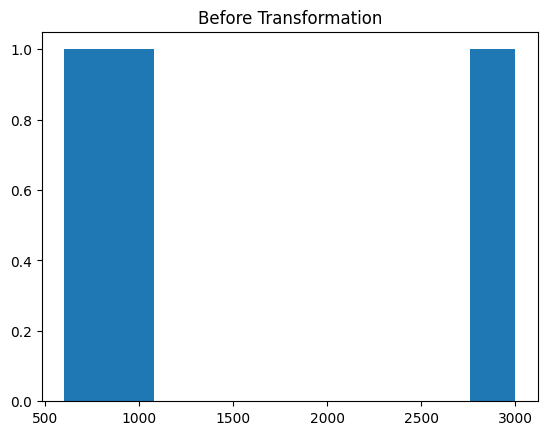

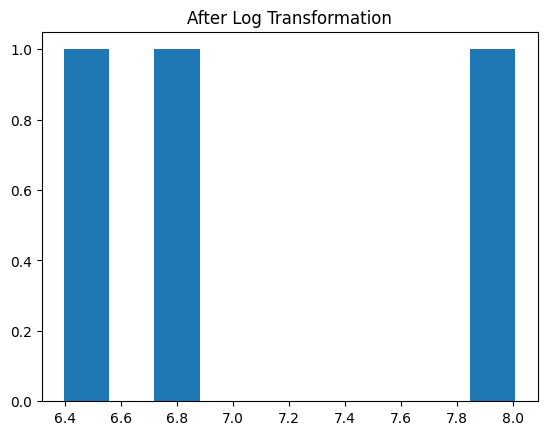

In [15]:
#Visualizing Distribution
import matplotlib.pyplot as plt

plt.hist(df["total_charges"])
plt.title("Before Transformation")
plt.show()

plt.hist(df["log_total_charges"])
plt.title("After Log Transformation")
plt.show()

In [16]:
#Polynomial Features (Degree 2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[["monthly_charges","age"]])

In [17]:
#Feature Selection Techniques
# 1. Variance Threshold
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(df.select_dtypes(include=np.number))

In [19]:
# 2. Correlation-Based Selection
# Select only numeric columns for correlation calculation
corr_matrix = df.select_dtypes(include=np.number).corr()
print(corr_matrix)

                            age  monthly_charges  total_charges  \
age                    1.000000         0.993399       0.907841   
monthly_charges        0.993399         1.000000       0.949947   
total_charges          0.907841         0.949947       1.000000   
num_support_calls      0.960769         0.986241       0.988522   
contract_length        0.866025         0.917663       0.995871   
account_age_days       0.309054         0.416106       0.679358   
days_since_last_login  0.767988         0.836385       0.965767   
signup_month           0.993399         1.000000       0.949947   
signup_quarter         0.866025         0.917663       0.995871   
signup_dayofweek      -0.960769        -0.986241      -0.988522   
avg_monthly_spend      0.965567         0.989036       0.985668   
calls_per_month        0.981981         0.953821       0.812240   
log_total_charges      0.947897         0.978184       0.994124   
boxcox_total           0.983690         0.997830       0.96845

In [21]:
# 3. Tree-Based Feature Importance
from sklearn.ensemble import RandomForestClassifier
import numpy as np


df['churn'] = (df['account_age_days'] > df['account_age_days'].mean()).astype(int)

X = df.select_dtypes(include=np.number).drop(columns=['churn'])
y = df['churn']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
print("Feature Importances:\n", pd.Series(importances, index=X.columns).sort_values(ascending=False))

Feature Importances:
 age                      0.112903
account_age_days         0.112903
days_since_last_login    0.108871
total_charges            0.092742
avg_monthly_spend        0.076613
log_total_charges        0.076613
calls_per_month          0.072581
monthly_charges          0.068548
num_support_calls        0.064516
boxcox_total             0.060484
signup_dayofweek         0.056452
contract_length          0.044355
signup_month             0.028226
yj_support_calls         0.020161
signup_quarter           0.004032
dtype: float64


In [22]:
#Memory Optimization and Efficient Processing

In [23]:
initial_memory_usage = df.memory_usage(deep=True).sum()
print(f"Initial memory usage of DataFrame: {initial_memory_usage} bytes")

Initial memory usage of DataFrame: 1416 bytes


In [32]:
def optimize_dataframe_memory(df):
    optimized_df = df.copy()

    # Downcast numeric types
    for col in optimized_df.select_dtypes(include=['int', 'float']).columns:
        if optimized_df[col].dtype == 'int':
            # Attempt to downcast integers
            optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='integer')
        elif optimized_df[col].dtype == 'float':
            # Attempt to downcast floats to float32
            optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='float')

    # Convert object columns to category
    for col in optimized_df.select_dtypes(include=['object']).columns:
        num_unique_values = len(optimized_df[col].unique())
        num_total_values = len(optimized_df[col])
        if num_unique_values / num_total_values < 0.5: # Heuristic: if unique values are less than 50% of total rows
            optimized_df[col] = optimized_df[col].astype('category')


    return optimized_df

print("Defined optimize_dataframe_memory function.")

Defined optimize_dataframe_memory function.


In [25]:
df_optimized = optimize_dataframe_memory(df)
print("Optimized DataFrame created.")

Optimized DataFrame created.


In [26]:
optimized_memory_usage = df_optimized.memory_usage(deep=True).sum()
print(f"Optimized memory usage of DataFrame: {optimized_memory_usage} bytes")

percentage_reduction = ((initial_memory_usage - optimized_memory_usage) / initial_memory_usage) * 100
print(f"Percentage memory reduction: {percentage_reduction:.2f}%")

Optimized memory usage of DataFrame: 1194 bytes
Percentage memory reduction: 15.68%


In [27]:
import pandas as pd
import numpy as np
import os

# Define the number of rows for the synthetic dataset
num_rows = 100000

# Generate synthetic data
data = {
    "transaction_id": np.arange(num_rows),  # Integer
    "customer_id": np.random.randint(1, 10000, size=num_rows),  # Integer, potentially lower cardinality for category
    "product_category": np.random.choice(["Electronics", "Clothing", "Home Goods", "Food", "Books"], size=num_rows), # String (low cardinality)
    "order_quantity": np.random.randint(1, 20, size=num_rows),  # Integer
    "price_per_unit": np.round(np.random.uniform(5.0, 500.0, size=num_rows), 2),  # Float
    "transaction_date": pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365, size=num_rows), unit='D'), # Date
    "store_location": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"], size=num_rows), # String (low cardinality)
    "payment_method": np.random.choice(["Credit Card", "PayPal", "Bank Transfer"], size=num_rows), # String (low cardinality)
    "shipping_cost": np.round(np.random.uniform(0.0, 25.0, size=num_rows), 2) # Float
}

df_large = pd.DataFrame(data)

# Introduce some missing values randomly for variety
for col in ['order_quantity', 'price_per_unit', 'shipping_cost']:
    df_large.loc[df_large.sample(frac=0.05).index, col] = np.nan

# Save the DataFrame to a CSV file
csv_file_path = "large_data.csv"
df_large.to_csv(csv_file_path, index=False)

print(f"Synthetic CSV file '{csv_file_path}' with {num_rows} rows created successfully!")
print("First 5 rows of the generated DataFrame:")
print(df_large.head())

Synthetic CSV file 'large_data.csv' with 100000 rows created successfully!
First 5 rows of the generated DataFrame:
   transaction_id  customer_id product_category  order_quantity  \
0               0         2315      Electronics             4.0   
1               1         2089      Electronics             1.0   
2               2         7990         Clothing             6.0   
3               3         8115             Food             2.0   
4               4         1990       Home Goods             5.0   

   price_per_unit transaction_date store_location payment_method  \
0          193.53       2023-12-01        Chicago    Credit Card   
1          473.60       2023-11-17       New York  Bank Transfer   
2           63.85       2023-05-07    Los Angeles         PayPal   
3            9.52       2023-06-21    Los Angeles         PayPal   
4           23.22       2023-05-02        Houston  Bank Transfer   

   shipping_cost  
0            NaN  
1          14.52  
2           2.8

In [28]:
import time

csv_file_path = "large_data.csv"

# Measure time to load without optimizations
start_time = time.time()
df_benchmark = pd.read_csv(csv_file_path)
end_time = time.time()

benchmark_loading_time = end_time - start_time
benchmark_memory_usage = df_benchmark.memory_usage(deep=True).sum()

print(f"Benchmark - Loading Time: {benchmark_loading_time:.4f} seconds")
print(f"Benchmark - Memory Usage: {benchmark_memory_usage} bytes")

Benchmark - Loading Time: 0.1446 seconds
Benchmark - Memory Usage: 27159210 bytes


In [29]:
import time

# Identify a subset of columns to load
selected_columns = ["transaction_id", "customer_id", "product_category", "order_quantity", "shipping_cost"]

# Measure time to load with selective columns
start_time = time.time()
df_selected_cols = pd.read_csv(csv_file_path, usecols=selected_columns)
end_time = time.time()

selected_cols_loading_time = end_time - start_time
selected_cols_memory_usage = df_selected_cols.memory_usage(deep=True).sum()

print(f"Selective Columns Loading - Loading Time: {selected_cols_loading_time:.4f} seconds")
print(f"Selective Columns Loading - Memory Usage: {selected_cols_memory_usage} bytes")
print("First 5 rows of selectively loaded DataFrame:")
print(df_selected_cols.head())

Selective Columns Loading - Loading Time: 0.0831 seconds
Selective Columns Loading - Memory Usage: 8859664 bytes
First 5 rows of selectively loaded DataFrame:
   transaction_id  customer_id product_category  order_quantity  shipping_cost
0               0         2315      Electronics             4.0            NaN
1               1         2089      Electronics             1.0          14.52
2               2         7990         Clothing             6.0           2.84
3               3         8115             Food             2.0          22.22
4               4         1990       Home Goods             5.0          11.08


In [30]:
import time

# Define efficient dtypes for columns
dtype_optimizations = {
    "transaction_id": "int32",
    "customer_id": "int16",
    "product_category": "category",
    "order_quantity": "float32",  # Using float32 due to potential NaN values from random introduction
    "price_per_unit": "float32",  # Using float32 due to potential NaN values
    "store_location": "category",
    "payment_method": "category",
    "shipping_cost": "float32"  # Using float32 due to potential NaN values
}

# Columns that need to be parsed as dates
parse_dates_cols = ["transaction_date"]

# Measure time to load with efficient dtypes
start_time = time.time()
df_optimized_dtypes = pd.read_csv(
    csv_file_path,
    dtype=dtype_optimizations,
    parse_dates=parse_dates_cols
)
end_time = time.time()

optimized_dtypes_loading_time = end_time - start_time
optimized_dtypes_memory_usage = df_optimized_dtypes.memory_usage(deep=True).sum()

print(f"Optimized Dtypes Loading - Loading Time: {optimized_dtypes_loading_time:.4f} seconds")
print(f"Optimized Dtypes Loading - Memory Usage: {optimized_dtypes_memory_usage} bytes")
print("First 5 rows of DataFrame with optimized dtypes:")
print(df_optimized_dtypes.head())

Optimized Dtypes Loading - Loading Time: 0.8134 seconds
Optimized Dtypes Loading - Memory Usage: 2901329 bytes
First 5 rows of DataFrame with optimized dtypes:
   transaction_id  customer_id product_category  order_quantity  \
0               0         2315      Electronics             4.0   
1               1         2089      Electronics             1.0   
2               2         7990         Clothing             6.0   
3               3         8115             Food             2.0   
4               4         1990       Home Goods             5.0   

   price_per_unit transaction_date store_location payment_method  \
0      193.529999       2023-12-01        Chicago    Credit Card   
1      473.600006       2023-11-17       New York  Bank Transfer   
2       63.849998       2023-05-07    Los Angeles         PayPal   
3        9.520000       2023-06-21    Los Angeles         PayPal   
4       23.219999       2023-05-02        Houston  Bank Transfer   

   shipping_cost  
0        

In [33]:
import time

chunk_size = 10000  # Define a chunk size

# Measure time and process data in chunks
start_time = time.time()

# Initialize an empty list to store processed chunks or aggregate results
processed_chunks = []

for i, chunk_df in enumerate(pd.read_csv(csv_file_path, chunksize=chunk_size)):
    # Example processing: calculate sum of 'order_quantity' for each chunk
    # In a real scenario, you would perform desired operations on each chunk
    # without loading the entire dataset into memory.
    chunk_sum_quantity = chunk_df['order_quantity'].sum()
    processed_chunks.append(chunk_sum_quantity)
    if i < 3: # Print for first few chunks to show progress/example
        print(f"Processed chunk {i+1}, sum of order_quantity: {chunk_sum_quantity}")

end_time = time.time()

chunked_loading_time = end_time - start_time

print(f"\nChunked Processing - Total Time: {chunked_loading_time:.4f} seconds")
print(f"Aggregated results from chunks (first 5): {processed_chunks[:5]}")



Processed chunk 1, sum of order_quantity: 96179.0
Processed chunk 2, sum of order_quantity: 94368.0
Processed chunk 3, sum of order_quantity: 95796.0

Chunked Processing - Total Time: 0.1969 seconds
Aggregated results from chunks (first 5): [np.float64(96179.0), np.float64(94368.0), np.float64(95796.0), np.float64(94634.0), np.float64(94787.0)]


In [34]:
#Data Pipelines and Practical Implementation

In [36]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.3 MB/s eta 0:00:00


In [43]:
import pandas as pd
import numpy as np
import logging
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import joblib
import warnings

class DataCleaningPipeline:
    def __init__(self, config):
        self.config = config
        self.logger = self._setup_logging()
        self.imputers = {}
        self.encoders = {}
        self.scalers = {}
        self.logger.info("DataCleaningPipeline initialized.")

    def _setup_logging(self):
        logger = logging.getLogger(self.__class__.__name__)
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger

print("DataCleaningPipeline class defined.")

DataCleaningPipeline class defined.


In [45]:
#Implement handle_missing_values Method
import pandas as pd
import numpy as np
import logging
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import joblib
import warnings

class DataCleaningPipeline:
    def __init__(self, config):
        self.config = config
        self.logger = self._setup_logging()
        self.imputers = {}
        self.encoders = {}
        self.scalers = {}
        self.logger.info("DataCleaningPipeline initialized.")

    def _setup_logging(self):
        logger = logging.getLogger(self.__class__.__name__)
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger

    def handle_missing_values(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        missing_values_config = self.config.get('missing_values_config', [])
        self.logger.info(f"Starting missing value imputation in '{mode}' mode.")

        for item in missing_values_config:
            column = item.get('column')
            strategy = item.get('imputation_strategy')
            fill_value = item.get('fill_value', None) # Only for 'constant' strategy

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping imputation for this column.")
                continue

            try:
                if strategy in ['mean', 'median', 'mode', 'constant']:
                    imputer_key = f"{column}_{strategy}"

                    if mode in ['fit', 'fit_transform']:
                        if imputer_key not in self.imputers:
                            if strategy == 'constant':
                                if fill_value is None:
                                    self.logger.error(f"'fill_value' must be provided for 'constant' strategy in column '{column}'. Skipping.")
                                    continue
                                imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
                            else:
                                imputer = SimpleImputer(strategy=strategy)

                            # Fit on the non-NaN values for mean/median/mode, or on all for constant
                            imputer.fit(df[[column]])
                            self.imputers[imputer_key] = imputer
                            self.logger.info(f"Fitted {strategy} imputer for column '{column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if imputer_key in self.imputers:
                            df[column] = self.imputers[imputer_key].transform(df[[column]])
                            self.logger.info(f"Applied {strategy} imputation to column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted imputer found for column '{column}' with strategy '{strategy}' in transform mode. Skipping.")

                elif strategy in ['ffill', 'bfill']:
                    if mode in ['transform', 'fit_transform']:
                        if strategy == 'ffill':
                            df[column] = df[column].ffill()
                            self.logger.info(f"Applied forward-fill imputation to column '{column}'.")
                        elif strategy == 'bfill':
                            df[column] = df[column].bfill()
                            self.logger.info(f"Applied backward-fill imputation to column '{column}'.")

                else:
                    self.logger.warning(f"Unsupported imputation strategy '{strategy}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during imputation for column '{column}' with strategy '{strategy}': {e}")

        self.logger.info("Finished missing value imputation.")
        return df

print("handle_missing_values method added to DataCleaningPipeline class.")

handle_missing_values method added to DataCleaningPipeline class.


In [47]:
#Implement handle_outliers Method
import pandas as pd
import numpy as np
import logging
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import joblib
import warnings

class DataCleaningPipeline:
    def __init__(self, config):
        self.config = config
        self.logger = self._setup_logging()
        self.imputers = {}
        self.encoders = {}
        self.scalers = {}
        self.logger.info("DataCleaningPipeline initialized.")

    def _setup_logging(self):
        logger = logging.getLogger(self.__class__.__name__)
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger

    def handle_missing_values(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        missing_values_config = self.config.get('missing_values_config', [])
        self.logger.info(f"Starting missing value imputation in '{mode}' mode.")

        for item in missing_values_config:
            column = item.get('column')
            strategy = item.get('imputation_strategy')
            fill_value = item.get('fill_value', None)

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping imputation for this column.")
                continue

            try:
                if strategy in ['mean', 'median', 'mode', 'constant']:
                    imputer_key = f"{column}_{strategy}"

                    if mode in ['fit', 'fit_transform']:
                        if imputer_key not in self.imputers:
                            if strategy == 'constant':
                                if fill_value is None:
                                    self.logger.error(f"'fill_value' must be provided for 'constant' strategy in column '{column}'. Skipping.")
                                    continue
                                imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
                            else:
                                imputer = SimpleImputer(strategy=strategy)

                            imputer.fit(df[[column]])
                            self.imputers[imputer_key] = imputer
                            self.logger.info(f"Fitted {strategy} imputer for column '{column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if imputer_key in self.imputers:
                            df[column] = self.imputers[imputer_key].transform(df[[column]])
                            self.logger.info(f"Applied {strategy} imputation to column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted imputer found for column '{column}' with strategy '{strategy}' in transform mode. Skipping.")

                elif strategy in ['ffill', 'bfill']:
                    if mode in ['transform', 'fit_transform']:
                        if strategy == 'ffill':
                            df[column] = df[column].ffill()
                            self.logger.info(f"Applied forward-fill imputation to column '{column}'.")
                        elif strategy == 'bfill':
                            df[column] = df[column].bfill()
                            self.logger.info(f"Applied backward-fill imputation to column '{column}'.")

                else:
                    self.logger.warning(f"Unsupported imputation strategy '{strategy}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during imputation for column '{column}' with strategy '{strategy}': {e}")

        self.logger.info("Finished missing value imputation.")
        return df

    def handle_outliers(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        outlier_config = self.config.get('outlier_config', [])
        self.logger.info(f"Starting outlier handling in '{mode}' mode.")

        for item in outlier_config:
            column = item.get('column')
            detection_method = item.get('detection_method')
            treatment_method = item.get('treatment_method')

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping outlier handling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping outlier handling for this column.")
                continue

            if treatment_method != 'capping':
                self.logger.warning(f"Unsupported treatment method '{treatment_method}' for column '{column}'. Skipping.")
                continue

            lower_bound_key = f'{column}_{detection_method}_lower_bound'
            upper_bound_key = f'{column}_{detection_method}_upper_bound'

            try:
                if mode in ['fit', 'fit_transform']:
                    if detection_method == 'iqr':
                        iqr_multiplier = item.get('iqr_multiplier', 1.5)
                        Q1 = df[column].quantile(0.25)
                        Q3 = df[column].quantile(0.75)
                        IQR = Q3 - Q1
                        lower_bound = Q1 - iqr_multiplier * IQR
                        upper_bound = Q3 + iqr_multiplier * IQR
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted IQR bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    elif detection_method == 'zscore':
                        zscore_threshold = item.get('zscore_threshold', 3)
                        mean = df[column].mean()
                        std = df[column].std()
                        lower_bound = mean - zscore_threshold * std
                        upper_bound = mean + zscore_threshold * std
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted Z-score bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    else:
                        self.logger.warning(f"Unsupported detection method '{detection_method}' for column '{column}'. Skipping.")
                        continue

                if mode in ['transform', 'fit_transform']:
                    if lower_bound_key in self.scalers and upper_bound_key in self.scalers:
                        lower_bound = self.scalers[lower_bound_key]
                        upper_bound = self.scalers[upper_bound_key]

                        df[column] = np.clip(df[column], lower_bound, upper_bound)
                        self.logger.info(f"Applied capping to column '{column}' using {detection_method} bounds. Values clipped to [{lower_bound:.2f}, {upper_bound:.2f}]")
                    else:
                        self.logger.warning(f"Bounds for column '{column}' with detection method '{detection_method}' not found in scalers. Skipping transform.")

            except Exception as e:
                self.logger.error(f"Error during outlier handling for column '{column}' with method '{detection_method}': {e}")

        self.logger.info("Finished outlier handling.")
        return df

print("handle_outliers method added to DataCleaningPipeline class.")

handle_outliers method added to DataCleaningPipeline class.


In [48]:
#Implement encode_categorical Method
import pandas as pd
import numpy as np
import logging
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import joblib
import warnings

class DataCleaningPipeline:
    def __init__(self, config):
        self.config = config
        self.logger = self._setup_logging()
        self.imputers = {}
        self.encoders = {}
        self.scalers = {}
        self.logger.info("DataCleaningPipeline initialized.")

    def _setup_logging(self):
        logger = logging.getLogger(self.__class__.__name__)
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger

    def handle_missing_values(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        missing_values_config = self.config.get('missing_values_config', [])
        self.logger.info(f"Starting missing value imputation in '{mode}' mode.")

        for item in missing_values_config:
            column = item.get('column')
            strategy = item.get('imputation_strategy')
            fill_value = item.get('fill_value', None)

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping imputation for this column.")
                continue

            try:
                if strategy in ['mean', 'median', 'mode', 'constant']:
                    imputer_key = f"{column}_{strategy}"

                    if mode in ['fit', 'fit_transform']:
                        if imputer_key not in self.imputers:
                            if strategy == 'constant':
                                if fill_value is None:
                                    self.logger.error(f"'fill_value' must be provided for 'constant' strategy in column '{column}'. Skipping.")
                                    continue
                                imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
                            else:
                                imputer = SimpleImputer(strategy=strategy)

                            imputer.fit(df[[column]])
                            self.imputers[imputer_key] = imputer
                            self.logger.info(f"Fitted {strategy} imputer for column '{column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if imputer_key in self.imputers:
                            df[column] = self.imputers[imputer_key].transform(df[[column]])
                            self.logger.info(f"Applied {strategy} imputation to column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted imputer found for column '{column}' with strategy '{strategy}' in transform mode. Skipping.")

                elif strategy in ['ffill', 'bfill']:
                    if mode in ['transform', 'fit_transform']:
                        if strategy == 'ffill':
                            df[column] = df[column].ffill()
                            self.logger.info(f"Applied forward-fill imputation to column '{column}'.")
                        elif strategy == 'bfill':
                            df[column] = df[column].bfill()
                            self.logger.info(f"Applied backward-fill imputation to column '{column}'.")

                else:
                    self.logger.warning(f"Unsupported imputation strategy '{strategy}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during imputation for column '{column}' with strategy '{strategy}': {e}")

        self.logger.info("Finished missing value imputation.")
        return df

    def handle_outliers(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        outlier_config = self.config.get('outlier_config', [])
        self.logger.info(f"Starting outlier handling in '{mode}' mode.")

        for item in outlier_config:
            column = item.get('column')
            detection_method = item.get('detection_method')
            treatment_method = item.get('treatment_method')

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping outlier handling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping outlier handling for this column.")
                continue

            if treatment_method != 'capping':
                self.logger.warning(f"Unsupported treatment method '{treatment_method}' for column '{column}'. Skipping.")
                continue

            lower_bound_key = f'{column}_{detection_method}_lower_bound'
            upper_bound_key = f'{column}_{detection_method}_upper_bound'

            try:
                if mode in ['fit', 'fit_transform']:
                    if detection_method == 'iqr':
                        iqr_multiplier = item.get('iqr_multiplier', 1.5)
                        Q1 = df[column].quantile(0.25)
                        Q3 = df[column].quantile(0.75)
                        IQR = Q3 - Q1
                        lower_bound = Q1 - iqr_multiplier * IQR
                        upper_bound = Q3 + iqr_multiplier * IQR
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted IQR bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    elif detection_method == 'zscore':
                        zscore_threshold = item.get('zscore_threshold', 3)
                        mean = df[column].mean()
                        std = df[column].std()
                        lower_bound = mean - zscore_threshold * std
                        upper_bound = mean + zscore_threshold * std
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted Z-score bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    else:
                        self.logger.warning(f"Unsupported detection method '{detection_method}' for column '{column}'. Skipping.")
                        continue

                if mode in ['transform', 'fit_transform']:
                    if lower_bound_key in self.scalers and upper_bound_key in self.scalers:
                        lower_bound = self.scalers[lower_bound_key]
                        upper_bound = self.scalers[upper_bound_key]

                        df[column] = np.clip(df[column], lower_bound, upper_bound)
                        self.logger.info(f"Applied capping to column '{column}' using {detection_method} bounds. Values clipped to [{lower_bound:.2f}, {upper_bound:.2f}]")
                    else:
                        self.logger.warning(f"Bounds for column '{column}' with detection method '{detection_method}' not found in scalers. Skipping transform.")

            except Exception as e:
                self.logger.error(f"Error during outlier handling for column '{column}' with method '{detection_method}': {e}")

        self.logger.info("Finished outlier handling.")
        return df

    def encode_categorical(self, X, y=None, mode='fit_transform'):
        df = X.copy(deep=True)
        categorical_encoding_config = self.config.get('categorical_encoding_config', [])
        self.logger.info(f"Starting categorical encoding in '{mode}' mode.")

        for item in categorical_encoding_config:
            column = item.get('column')
            encoding_type = item.get('encoding_type')
            replace_original = item.get('replace_original', True) # Default to replacing original
            params = item.get('params', {}) # For additional encoder parameters

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping encoding for this column.")
                continue

            # Check if the column is categorical or object type
            if not pd.api.types.is_categorical_dtype(df[column]) and not pd.api.types.is_object_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not categorical or object type. Skipping encoding for this column.")
                continue

            try:
                encoder_key = f"{column}_{encoding_type}"

                if encoding_type == 'label':
                    mapping = params.get('mapping')
                    if mapping: # Use explicit mapping if provided
                        if mode in ['transform', 'fit_transform']:
                            new_column_name = f'{column}_encoded'
                            df[new_column_name] = df[column].map(mapping)
                            self.logger.info(f"Applied label encoding (mapping) to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                    else: # Fallback to sklearn LabelEncoder if no explicit mapping
                        self.logger.warning(f"No explicit mapping provided for label encoding of column '{column}'. Using sklearn LabelEncoder.")
                        if mode in ['fit', 'fit_transform']:
                            if encoder_key not in self.encoders:
                                le = LabelEncoder()
                                le.fit(df[column].astype(str)) # Convert to string to handle potential NaN/non-string types
                                self.encoders[encoder_key] = le
                                self.logger.info(f"Fitted LabelEncoder for column '{column}'.")
                        if mode in ['transform', 'fit_transform']:
                            if encoder_key in self.encoders:
                                new_column_name = f'{column}_encoded'
                                df[new_column_name] = self.encoders[encoder_key].transform(df[column].astype(str))
                                self.logger.info(f"Applied LabelEncoder to column '{column}'. New column: '{new_column_name}'.")
                                if replace_original:
                                    df = df.drop(columns=[column])
                                    self.logger.info(f"Dropped original column '{column}'.")
                            else:
                                self.logger.warning(f"No fitted LabelEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'one_hot':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, **params)
                            ohe.fit(df[[column]])
                            self.encoders[encoder_key] = ohe
                            self.logger.info(f"Fitted OneHotEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            ohe_cols = self.encoders[encoder_key].transform(df[[column]])
                            feature_names = self.encoders[encoder_key].get_feature_names_out([column])
                            ohe_df = pd.DataFrame(ohe_cols, index=df.index, columns=feature_names)
                            df = pd.concat([df, ohe_df], axis=1)
                            self.logger.info(f"Applied OneHotEncoder to column '{column}'. Added {len(feature_names)} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted OneHotEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'frequency':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            # Normalize=True to get proportions/frequencies
                            freq_map = df[column].value_counts(normalize=True).to_dict()
                            self.encoders[encoder_key] = freq_map
                            self.logger.info(f"Fitted frequency map for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_freq_encoded'
                            df[new_column_name] = df[column].map(self.encoders[encoder_key])
                            self.logger.info(f"Applied frequency encoding to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted frequency map found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'binary':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            be = BinaryEncoder(cols=[column], handle_unknown='ignore', **params)
                            be.fit(df[[column]])
                            self.encoders[encoder_key] = be
                            self.logger.info(f"Fitted BinaryEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            binary_cols_df = self.encoders[encoder_key].transform(df[[column]])
                            df = pd.concat([df, binary_cols_df], axis=1)
                            self.logger.info(f"Applied BinaryEncoder to column '{column}'. Added {binary_cols_df.shape[1]} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted BinaryEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'target':
                    target_column = item.get('target_column')
                    if target_column is None:
                        self.logger.error(f"'target_column' must be specified for target encoding of column '{column}'. Skipping.")
                        continue

                    if mode in ['fit', 'fit_transform']:
                        if y is None:
                            self.logger.error(f"'y' (target variable) must be provided for target encoding in fit/fit_transform mode for column '{column}'. Skipping.")
                            continue
                        if encoder_key not in self.encoders:
                            te = TargetEncoder(cols=[column], handle_unknown='value', **params)
                            # Ensure y is a Series for fitting
                            target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                            te.fit(df[[column]], target_series)
                            self.encoders[encoder_key] = te
                            self.logger.info(f"Fitted TargetEncoder for column '{column}' with target '{target_column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_target_encoded'
                            # For transform, y is optional, if provided for smoothing, use it.
                            # If y is provided for fit_transform, it should be passed here too.
                            if y is not None:
                                target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]], target_series)
                            else:
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]])
                            self.logger.info(f"Applied TargetEncoder to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted TargetEncoder found for column '{column}' in transform mode. Skipping.")

                else:
                    self.logger.warning(f"Unsupported encoding type '{encoding_type}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during {encoding_type} encoding for column '{column}': {e}")

        self.logger.info("Finished categorical encoding.")
        return df

print("encode_categorical method added to DataCleaningPipeline class.")

encode_categorical method added to DataCleaningPipeline class.


In [41]:
import pandas as pd
import numpy as np
import logging
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import joblib
import warnings

class DataCleaningPipeline:
    def __init__(self, config):
        self.config = config
        self.logger = self._setup_logging()
        self.imputers = {}
        self.encoders = {}
        self.scalers = {}
        self.logger.info("DataCleaningPipeline initialized.")

    def _setup_logging(self):
        logger = logging.getLogger(self.__class__.__name__)
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger

    def handle_missing_values(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        missing_values_config = self.config.get('missing_values_config', [])
        self.logger.info(f"Starting missing value imputation in '{mode}' mode.")

        for item in missing_values_config:
            column = item.get('column')
            strategy = item.get('imputation_strategy')
            fill_value = item.get('fill_value', None)

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping imputation for this column.")
                continue

            try:
                if strategy in ['mean', 'median', 'mode', 'constant']:
                    imputer_key = f"{column}_{strategy}"

                    if mode in ['fit', 'fit_transform']:
                        if imputer_key not in self.imputers:
                            if strategy == 'constant':
                                if fill_value is None:
                                    self.logger.error(f"'fill_value' must be provided for 'constant' strategy in column '{column}'. Skipping.")
                                    continue
                                imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
                            else:
                                imputer = SimpleImputer(strategy=strategy)

                            imputer.fit(df[[column]])
                            self.imputers[imputer_key] = imputer
                            self.logger.info(f"Fitted {strategy} imputer for column '{column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if imputer_key in self.imputers:
                            df[column] = self.imputers[imputer_key].transform(df[[column]])
                            self.logger.info(f"Applied {strategy} imputation to column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted imputer found for column '{column}' with strategy '{strategy}' in transform mode. Skipping.")

                elif strategy in ['ffill', 'bfill']:
                    if mode in ['transform', 'fit_transform']:
                        if strategy == 'ffill':
                            df[column] = df[column].ffill()
                            self.logger.info(f"Applied forward-fill imputation to column '{column}'.")
                        elif strategy == 'bfill':
                            df[column] = df[column].bfill()
                            self.logger.info(f"Applied backward-fill imputation to column '{column}'.")

                else:
                    self.logger.warning(f"Unsupported imputation strategy '{strategy}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during imputation for column '{column}' with strategy '{strategy}': {e}")

        self.logger.info("Finished missing value imputation.")
        return df

    def handle_outliers(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        outlier_config = self.config.get('outlier_config', [])
        self.logger.info(f"Starting outlier handling in '{mode}' mode.")

        for item in outlier_config:
            column = item.get('column')
            detection_method = item.get('detection_method')
            treatment_method = item.get('treatment_method')

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping outlier handling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping outlier handling for this column.")
                continue

            if treatment_method != 'capping':
                self.logger.warning(f"Unsupported treatment method '{treatment_method}' for column '{column}'. Skipping.")
                continue

            lower_bound_key = f'{column}_{detection_method}_lower_bound'
            upper_bound_key = f'{column}_{detection_method}_upper_bound'

            try:
                if mode in ['fit', 'fit_transform']:
                    if detection_method == 'iqr':
                        iqr_multiplier = item.get('iqr_multiplier', 1.5)
                        Q1 = df[column].quantile(0.25)
                        Q3 = df[column].quantile(0.75)
                        IQR = Q3 - Q1
                        lower_bound = Q1 - iqr_multiplier * IQR
                        upper_bound = Q3 + iqr_multiplier * IQR
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted IQR bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    elif detection_method == 'zscore':
                        zscore_threshold = item.get('zscore_threshold', 3)
                        mean = df[column].mean()
                        std = df[column].std()
                        lower_bound = mean - zscore_threshold * std
                        upper_bound = mean + zscore_threshold * std
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted Z-score bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    else:
                        self.logger.warning(f"Unsupported detection method '{detection_method}' for column '{column}'. Skipping.")
                        continue

                if mode in ['transform', 'fit_transform']:
                    if lower_bound_key in self.scalers and upper_bound_key in self.scalers:
                        lower_bound = self.scalers[lower_bound_key]
                        upper_bound = self.scalers[upper_bound_key]

                        df[column] = np.clip(df[column], lower_bound, upper_bound)
                        self.logger.info(f"Applied capping to column '{column}' using {detection_method} bounds. Values clipped to [{lower_bound:.2f}, {upper_bound:.2f}]")
                    else:
                        self.logger.warning(f"Bounds for column '{column}' with detection method '{detection_method}' not found in scalers. Skipping transform.")

            except Exception as e:
                self.logger.error(f"Error during outlier handling for column '{column}' with method '{detection_method}': {e}")

        self.logger.info("Finished outlier handling.")
        return df

    def encode_categorical(self, X, y=None, mode='fit_transform'):
        df = X.copy(deep=True)
        categorical_encoding_config = self.config.get('categorical_encoding_config', [])
        self.logger.info(f"Starting categorical encoding in '{mode}' mode.")

        for item in categorical_encoding_config:
            column = item.get('column')
            encoding_type = item.get('encoding_type')
            replace_original = item.get('replace_original', True) # Default to replacing original
            params = item.get('params', {}) # For additional encoder parameters

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping encoding for this column.")
                continue

            # Check if the column is categorical or object type
            if not pd.api.types.is_categorical_dtype(df[column]) and not pd.api.types.is_object_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not categorical or object type. Skipping encoding for this column.")
                continue

            try:
                encoder_key = f"{column}_{encoding_type}"

                if encoding_type == 'label':
                    mapping = params.get('mapping')
                    if mapping: # Use explicit mapping if provided
                        if mode in ['transform', 'fit_transform']:
                            new_column_name = f'{column}_encoded'
                            df[new_column_name] = df[column].map(mapping)
                            self.logger.info(f"Applied label encoding (mapping) to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                    else: # Fallback to sklearn LabelEncoder if no explicit mapping
                        self.logger.warning(f"No explicit mapping provided for label encoding of column '{column}'. Using sklearn LabelEncoder.")
                        if mode in ['fit', 'fit_transform']:
                            if encoder_key not in self.encoders:
                                le = LabelEncoder()
                                le.fit(df[column].astype(str)) # Convert to string to handle potential NaN/non-string types
                                self.encoders[encoder_key] = le
                                self.logger.info(f"Fitted LabelEncoder for column '{column}'.")
                        if mode in ['transform', 'fit_transform']:
                            if encoder_key in self.encoders:
                                new_column_name = f'{column}_encoded'
                                df[new_column_name] = self.encoders[encoder_key].transform(df[column].astype(str))
                                self.logger.info(f"Applied LabelEncoder to column '{column}'. New column: '{new_column_name}'.")
                                if replace_original:
                                    df = df.drop(columns=[column])
                                    self.logger.info(f"Dropped original column '{column}'.")
                            else:
                                self.logger.warning(f"No fitted LabelEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'one_hot':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, **params)
                            ohe.fit(df[[column]])
                            self.encoders[encoder_key] = ohe
                            self.logger.info(f"Fitted OneHotEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            ohe_cols = self.encoders[encoder_key].transform(df[[column]])
                            feature_names = self.encoders[encoder_key].get_feature_names_out([column])
                            ohe_df = pd.DataFrame(ohe_cols, index=df.index, columns=feature_names)
                            df = pd.concat([df, ohe_df], axis=1)
                            self.logger.info(f"Applied OneHotEncoder to column '{column}'. Added {len(feature_names)} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted OneHotEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'frequency':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            # Normalize=True to get proportions/frequencies
                            freq_map = df[column].value_counts(normalize=True).to_dict()
                            self.encoders[encoder_key] = freq_map
                            self.logger.info(f"Fitted frequency map for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_freq_encoded'
                            df[new_column_name] = df[column].map(self.encoders[encoder_key])
                            self.logger.info(f"Applied frequency encoding to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted frequency map found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'binary':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            be = BinaryEncoder(cols=[column], handle_unknown='ignore', **params)
                            be.fit(df[[column]])
                            self.encoders[encoder_key] = be
                            self.logger.info(f"Fitted BinaryEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            binary_cols_df = self.encoders[encoder_key].transform(df[[column]])
                            df = pd.concat([df, binary_cols_df], axis=1)
                            self.logger.info(f"Applied BinaryEncoder to column '{column}'. Added {binary_cols_df.shape[1]} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted BinaryEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'target':
                    target_column = item.get('target_column')
                    if target_column is None:
                        self.logger.error(f"'target_column' must be specified for target encoding of column '{column}'. Skipping.")
                        continue

                    if mode in ['fit', 'fit_transform']:
                        if y is None:
                            self.logger.error(f"'y' (target variable) must be provided for target encoding in fit/fit_transform mode for column '{column}'. Skipping.")
                            continue
                        if encoder_key not in self.encoders:
                            te = TargetEncoder(cols=[column], handle_unknown='value', **params)
                            # Ensure y is a Series for fitting
                            target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                            te.fit(df[[column]], target_series)
                            self.encoders[encoder_key] = te
                            self.logger.info(f"Fitted TargetEncoder for column '{column}' with target '{target_column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_target_encoded'
                            # For transform, y is optional, if provided for smoothing, use it.
                            # If y is provided for fit_transform, it should be passed here too.
                            if y is not None:
                                target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]], target_series)
                            else:
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]])
                            self.logger.info(f"Applied TargetEncoder to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted TargetEncoder found for column '{column}' in transform mode. Skipping.")

                else:
                    self.logger.warning(f"Unsupported encoding type '{encoding_type}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during {encoding_type} encoding for column '{column}': {e}")

        self.logger.info("Finished categorical encoding.")
        return df

    def scale_numerical_features(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        scaling_config = self.config.get('scaling_config', [])
        self.logger.info(f"Starting numerical feature scaling in '{mode}' mode.")

        for item in scaling_config:
            column = item.get('column')
            scaling_type = item.get('scaling_type')
            params = item.get('params', {}) # For additional scaler parameters

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping scaling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping scaling for this column.")
                continue

            try:
                scaler_key = f"{column}_{scaling_type}"

                if scaling_type == 'standard':
                    scaler_class = StandardScaler
                elif scaling_type == 'minmax':
                    scaler_class = MinMaxScaler
                elif scaling_type == 'robust':
                    scaler_class = RobustScaler
                else:
                    self.logger.warning(f"Unsupported scaling type '{scaling_type}' for column '{column}'. Skipping.")
                    continue

                if mode in ['fit', 'fit_transform']:
                    if scaler_key not in self.scalers:
                        scaler = scaler_class(**params)
                        scaler.fit(df[[column]])
                        self.scalers[scaler_key] = scaler
                        self.logger.info(f"Fitted {scaling_type} scaler for column '{column}'.")

                if mode in ['transform', 'fit_transform']:
                    if scaler_key in self.scalers:
                        df[column] = self.scalers[scaler_key].transform(df[[column]])
                        self.logger.info(f"Applied {scaling_type} scaling to column '{column}'.")
                    else:
                        self.logger.warning(f"No fitted {scaling_type} scaler found for column '{column}' in transform mode. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during {scaling_type} scaling for column '{column}': {e}")

        self.logger.info("Finished numerical feature scaling.")
        return df

print("scale_numerical_features method added to DataCleaningPipeline class.")


scale_numerical_features method added to DataCleaningPipeline class.


In [49]:
#Implement engineer_features Method
import pandas as pd
import numpy as np
import logging
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import joblib
import warnings

class DataCleaningPipeline:
    def __init__(self, config):
        self.config = config
        self.logger = self._setup_logging()
        self.imputers = {}
        self.encoders = {}
        self.scalers = {}
        self.logger.info("DataCleaningPipeline initialized.")

    def _setup_logging(self):
        logger = logging.getLogger(self.__class__.__name__)
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger

    def handle_missing_values(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        missing_values_config = self.config.get('missing_values_config', [])
        self.logger.info(f"Starting missing value imputation in '{mode}' mode.")

        for item in missing_values_config:
            column = item.get('column')
            strategy = item.get('imputation_strategy')
            fill_value = item.get('fill_value', None)

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping imputation for this column.")
                continue

            try:
                if strategy in ['mean', 'median', 'mode', 'constant']:
                    imputer_key = f"{column}_{strategy}"

                    if mode in ['fit', 'fit_transform']:
                        if imputer_key not in self.imputers:
                            if strategy == 'constant':
                                if fill_value is None:
                                    self.logger.error(f"'fill_value' must be provided for 'constant' strategy in column '{column}'. Skipping.")
                                    continue
                                imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
                            else:
                                imputer = SimpleImputer(strategy=strategy)

                            imputer.fit(df[[column]])
                            self.imputers[imputer_key] = imputer
                            self.logger.info(f"Fitted {strategy} imputer for column '{column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if imputer_key in self.imputers:
                            df[column] = self.imputers[imputer_key].transform(df[[column]])
                            self.logger.info(f"Applied {strategy} imputation to column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted imputer found for column '{column}' with strategy '{strategy}' in transform mode. Skipping.")

                elif strategy in ['ffill', 'bfill']:
                    if mode in ['transform', 'fit_transform']:
                        if strategy == 'ffill':
                            df[column] = df[column].ffill()
                            self.logger.info(f"Applied forward-fill imputation to column '{column}'.")
                        elif strategy == 'bfill':
                            df[column] = df[column].bfill()
                            self.logger.info(f"Applied backward-fill imputation to column '{column}'.")

                else:
                    self.logger.warning(f"Unsupported imputation strategy '{strategy}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during imputation for column '{column}' with strategy '{strategy}': {e}")

        self.logger.info("Finished missing value imputation.")
        return df

    def handle_outliers(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        outlier_config = self.config.get('outlier_config', [])
        self.logger.info(f"Starting outlier handling in '{mode}' mode.")

        for item in outlier_config:
            column = item.get('column')
            detection_method = item.get('detection_method')
            treatment_method = item.get('treatment_method')

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping outlier handling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping outlier handling for this column.")
                continue

            if treatment_method != 'capping':
                self.logger.warning(f"Unsupported treatment method '{treatment_method}' for column '{column}'. Skipping.")
                continue

            lower_bound_key = f'{column}_{detection_method}_lower_bound'
            upper_bound_key = f'{column}_{detection_method}_upper_bound'

            try:
                if mode in ['fit', 'fit_transform']:
                    if detection_method == 'iqr':
                        iqr_multiplier = item.get('iqr_multiplier', 1.5)
                        Q1 = df[column].quantile(0.25)
                        Q3 = df[column].quantile(0.75)
                        IQR = Q3 - Q1
                        lower_bound = Q1 - iqr_multiplier * IQR
                        upper_bound = Q3 + iqr_multiplier * IQR
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted IQR bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    elif detection_method == 'zscore':
                        zscore_threshold = item.get('zscore_threshold', 3)
                        mean = df[column].mean()
                        std = df[column].std()
                        lower_bound = mean - zscore_threshold * std
                        upper_bound = mean + zscore_threshold * std
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted Z-score bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    else:
                        self.logger.warning(f"Unsupported detection method '{detection_method}' for column '{column}'. Skipping.")
                        continue

                if mode in ['transform', 'fit_transform']:
                    if lower_bound_key in self.scalers and upper_bound_key in self.scalers:
                        lower_bound = self.scalers[lower_bound_key]
                        upper_bound = self.scalers[upper_bound_key]

                        df[column] = np.clip(df[column], lower_bound, upper_bound)
                        self.logger.info(f"Applied capping to column '{column}' using {detection_method} bounds. Values clipped to [{lower_bound:.2f}, {upper_bound:.2f}]")
                    else:
                        self.logger.warning(f"Bounds for column '{column}' with detection method '{detection_method}' not found in scalers. Skipping transform.")

            except Exception as e:
                self.logger.error(f"Error during outlier handling for column '{column}' with method '{detection_method}': {e}")

        self.logger.info("Finished outlier handling.")
        return df

    def encode_categorical(self, X, y=None, mode='fit_transform'):
        df = X.copy(deep=True)
        categorical_encoding_config = self.config.get('categorical_encoding_config', [])
        self.logger.info(f"Starting categorical encoding in '{mode}' mode.")

        for item in categorical_encoding_config:
            column = item.get('column')
            encoding_type = item.get('encoding_type')
            replace_original = item.get('replace_original', True) # Default to replacing original
            params = item.get('params', {}) # For additional encoder parameters

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping encoding for this column.")
                continue

            # Check if the column is categorical or object type
            if not pd.api.types.is_categorical_dtype(df[column]) and not pd.api.types.is_object_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not categorical or object type. Skipping encoding for this column.")
                continue

            try:
                encoder_key = f"{column}_{encoding_type}"

                if encoding_type == 'label':
                    mapping = params.get('mapping')
                    if mapping: # Use explicit mapping if provided
                        if mode in ['transform', 'fit_transform']:
                            new_column_name = f'{column}_encoded'
                            df[new_column_name] = df[column].map(mapping)
                            self.logger.info(f"Applied label encoding (mapping) to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                    else: # Fallback to sklearn LabelEncoder if no explicit mapping
                        self.logger.warning(f"No explicit mapping provided for label encoding of column '{column}'. Using sklearn LabelEncoder.")
                        if mode in ['fit', 'fit_transform']:
                            if encoder_key not in self.encoders:
                                le = LabelEncoder()
                                le.fit(df[column].astype(str)) # Convert to string to handle potential NaN/non-string types
                                self.encoders[encoder_key] = le
                                self.logger.info(f"Fitted LabelEncoder for column '{column}'.")
                        if mode in ['transform', 'fit_transform']:
                            if encoder_key in self.encoders:
                                new_column_name = f'{column}_encoded'
                                df[new_column_name] = self.encoders[encoder_key].transform(df[column].astype(str))
                                self.logger.info(f"Applied LabelEncoder to column '{column}'. New column: '{new_column_name}'.")
                                if replace_original:
                                    df = df.drop(columns=[column])
                                    self.logger.info(f"Dropped original column '{column}'.")
                            else:
                                self.logger.warning(f"No fitted LabelEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'one_hot':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, **params)
                            ohe.fit(df[[column]])
                            self.encoders[encoder_key] = ohe
                            self.logger.info(f"Fitted OneHotEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            ohe_cols = self.encoders[encoder_key].transform(df[[column]])
                            feature_names = self.encoders[encoder_key].get_feature_names_out([column])
                            ohe_df = pd.DataFrame(ohe_cols, index=df.index, columns=feature_names)
                            df = pd.concat([df, ohe_df], axis=1)
                            self.logger.info(f"Applied OneHotEncoder to column '{column}'. Added {len(feature_names)} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted OneHotEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'frequency':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            # Normalize=True to get proportions/frequencies
                            freq_map = df[column].value_counts(normalize=True).to_dict()
                            self.encoders[encoder_key] = freq_map
                            self.logger.info(f"Fitted frequency map for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_freq_encoded'
                            df[new_column_name] = df[column].map(self.encoders[encoder_key])
                            self.logger.info(f"Applied frequency encoding to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted frequency map found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'binary':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            be = BinaryEncoder(cols=[column], handle_unknown='ignore', **params)
                            be.fit(df[[column]])
                            self.encoders[encoder_key] = be
                            self.logger.info(f"Fitted BinaryEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            binary_cols_df = self.encoders[encoder_key].transform(df[[column]])
                            df = pd.concat([df, binary_cols_df], axis=1)
                            self.logger.info(f"Applied BinaryEncoder to column '{column}'. Added {binary_cols_df.shape[1]} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted BinaryEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'target':
                    target_column = item.get('target_column')
                    if target_column is None:
                        self.logger.error(f"'target_column' must be specified for target encoding of column '{column}'. Skipping.")
                        continue

                    if mode in ['fit', 'fit_transform']:
                        if y is None:
                            self.logger.error(f"'y' (target variable) must be provided for target encoding in fit/fit_transform mode for column '{column}'. Skipping.")
                            continue
                        if encoder_key not in self.encoders:
                            te = TargetEncoder(cols=[column], handle_unknown='value', **params)
                            # Ensure y is a Series for fitting
                            target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                            te.fit(df[[column]], target_series)
                            self.encoders[encoder_key] = te
                            self.logger.info(f"Fitted TargetEncoder for column '{column}' with target '{target_column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_target_encoded'
                            # For transform, y is optional, if provided for smoothing, use it.
                            # If y is provided for fit_transform, it should be passed here too.
                            if y is not None:
                                target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]], target_series)
                            else:
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]])
                            self.logger.info(f"Applied TargetEncoder to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted TargetEncoder found for column '{column}' in transform mode. Skipping.")

                else:
                    self.logger.warning(f"Unsupported encoding type '{encoding_type}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during {encoding_type} encoding for column '{column}': {e}")

        self.logger.info("Finished categorical encoding.")
        return df

    def scale_numerical_features(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        scaling_config = self.config.get('scaling_config', [])
        self.logger.info(f"Starting numerical feature scaling in '{mode}' mode.")

        for item in scaling_config:
            column = item.get('column')
            scaling_type = item.get('scaling_type')
            params = item.get('params', {}) # For additional scaler parameters

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping scaling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping scaling for this column.")
                continue

            try:
                scaler_key = f"{column}_{scaling_type}"

                if scaling_type == 'standard':
                    scaler_class = StandardScaler
                elif scaling_type == 'minmax':
                    scaler_class = MinMaxScaler
                elif scaling_type == 'robust':
                    scaler_class = RobustScaler
                else:
                    self.logger.warning(f"Unsupported scaling type '{scaling_type}' for column '{column}'. Skipping.")
                    continue

                if mode in ['fit', 'fit_transform']:
                    if scaler_key not in self.scalers:
                        scaler = scaler_class(**params)
                        scaler.fit(df[[column]])
                        self.scalers[scaler_key] = scaler
                        self.logger.info(f"Fitted {scaling_type} scaler for column '{column}'.")

                if mode in ['transform', 'fit_transform']:
                    if scaler_key in self.scalers:
                        df[column] = self.scalers[scaler_key].transform(df[[column]])
                        self.logger.info(f"Applied {scaling_type} scaling to column '{column}'.")
                    else:
                        self.logger.warning(f"No fitted {scaling_type} scaler found for column '{column}' in transform mode. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during {scaling_type} scaling for column '{column}': {e}")

        self.logger.info("Finished numerical feature scaling.")
        return df

    def engineer_features(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        feature_engineering_config = self.config.get('feature_engineering_config', [])
        self.logger.info(f"Starting feature engineering in '{mode}' mode.")

        for item in feature_engineering_config:
            feature_type = item.get('feature_type')
            output_column = item.get('output_column')
            input_columns = item.get('input_columns')
            params = item.get('params', {})

            if not input_columns:
                self.logger.warning(f"'input_columns' not provided for feature type '{feature_type}'. Skipping.")
                continue

            # Ensure input columns exist and are numeric where required
            if feature_type in ['polynomial', 'log_transform', 'ratio']:
                missing_cols = [col for col in input_columns if col not in df.columns]
                if missing_cols:
                    self.logger.warning(f"Input columns {missing_cols} not found in DataFrame. Skipping '{feature_type}' feature engineering.")
                    continue

                non_numeric_cols = [col for col in input_columns if not pd.api.types.is_numeric_dtype(df[col])]
                if non_numeric_cols:
                    self.logger.warning(f"Input columns {non_numeric_cols} are not numeric. Skipping '{feature_type}' feature engineering.")
                    continue

            try:
                if feature_type == 'polynomial':
                    if not output_column:
                        self.logger.warning(f"'output_column' not provided for polynomial feature engineering. Skipping.")
                        continue
                    encoder_key = f'{output_column}_polynomial'

                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            poly = PolynomialFeatures(**params)
                            poly.fit(df[input_columns])
                            self.encoders[encoder_key] = poly
                            self.logger.info(f"Fitted PolynomialFeatures for input columns '{input_columns}'.")

                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            poly_features = self.encoders[encoder_key].transform(df[input_columns])
                            feature_names = self.encoders[encoder_key].get_feature_names_out(input_columns)
                            poly_df = pd.DataFrame(poly_features, index=df.index, columns=feature_names)
                            df = pd.concat([df, poly_df], axis=1)
                            self.logger.info(f"Created {len(feature_names)} polynomial features for input columns '{input_columns}'.")
                        else:
                            self.logger.warning(f"No fitted PolynomialFeatures found for '{input_columns}' in transform mode. Skipping.")

                elif feature_type == 'log_transform':
                    for col in input_columns:
                        new_col_name = f'{col}_log'
                        df[new_col_name] = np.log1p(df[col])
                        self.logger.info(f"Applied log1p transformation to column '{col}'. New column: '{new_col_name}'.")

                elif feature_type == 'ratio':
                    if len(input_columns) != 2:
                        self.logger.warning(f"Ratio feature requires exactly two input columns. Got {len(input_columns)}. Skipping.")
                        continue
                    col1, col2 = input_columns[0], input_columns[1]
                    new_col_name = output_column if output_column else f'{col1}_ratio_{col2}'

                    # Handle division by zero
                    with np.errstate(divide='ignore', invalid='ignore'): # Suppress RuntimeWarning for division by zero
                        ratio = df[col1] / df[col2]
                        ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
                    df[new_col_name] = ratio
                    self.logger.info(f"Created ratio feature '{new_col_name}' from '{col1}' and '{col2}'.")

                else:
                    self.logger.warning(f"Unsupported feature type '{feature_type}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during '{feature_type}' feature engineering for input columns '{input_columns}': {e}")

        self.logger.info("Finished feature engineering.")
        return df

print("engineer_features method added to DataCleaningPipeline class.")

engineer_features method added to DataCleaningPipeline class.


In [50]:
#Implement fit, transform, and fit_transform Methods
import pandas as pd
import numpy as np
import logging
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import joblib
import warnings

class DataCleaningPipeline:
    def __init__(self, config):
        self.config = config
        self.logger = self._setup_logging()
        self.imputers = {}
        self.encoders = {}
        self.scalers = {}
        self.logger.info("DataCleaningPipeline initialized.")

    def _setup_logging(self):
        logger = logging.getLogger(self.__class__.__name__)
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        return logger

    def handle_missing_values(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        missing_values_config = self.config.get('missing_values_config', [])
        self.logger.info(f"Starting missing value imputation in '{mode}' mode.")

        for item in missing_values_config:
            column = item.get('column')
            strategy = item.get('imputation_strategy')
            fill_value = item.get('fill_value', None)

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping imputation for this column.")
                continue

            try:
                if strategy in ['mean', 'median', 'mode', 'constant']:
                    imputer_key = f"{column}_{strategy}"

                    if mode in ['fit', 'fit_transform']:
                        if imputer_key not in self.imputers:
                            if strategy == 'constant':
                                if fill_value is None:
                                    self.logger.error(f"'fill_value' must be provided for 'constant' strategy in column '{column}'. Skipping.")
                                    continue
                                imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
                            else:
                                imputer = SimpleImputer(strategy=strategy)

                            imputer.fit(df[[column]])
                            self.imputers[imputer_key] = imputer
                            self.logger.info(f"Fitted {strategy} imputer for column '{column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if imputer_key in self.imputers:
                            df[column] = self.imputers[imputer_key].transform(df[[column]])
                            self.logger.info(f"Applied {strategy} imputation to column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted imputer found for column '{column}' with strategy '{strategy}' in transform mode. Skipping.")

                elif strategy in ['ffill', 'bfill']:
                    if mode in ['transform', 'fit_transform']:
                        if strategy == 'ffill':
                            df[column] = df[column].ffill()
                            self.logger.info(f"Applied forward-fill imputation to column '{column}'.")
                        elif strategy == 'bfill':
                            df[column] = df[column].bfill()
                            self.logger.info(f"Applied backward-fill imputation to column '{column}'.")

                else:
                    self.logger.warning(f"Unsupported imputation strategy '{strategy}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during imputation for column '{column}' with strategy '{strategy}': {e}")

        self.logger.info("Finished missing value imputation.")
        return df

    def handle_outliers(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        outlier_config = self.config.get('outlier_config', [])
        self.logger.info(f"Starting outlier handling in '{mode}' mode.")

        for item in outlier_config:
            column = item.get('column')
            detection_method = item.get('detection_method')
            treatment_method = item.get('treatment_method')

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping outlier handling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping outlier handling for this column.")
                continue

            if treatment_method != 'capping':
                self.logger.warning(f"Unsupported treatment method '{treatment_method}' for column '{column}'. Skipping.")
                continue

            lower_bound_key = f'{column}_{detection_method}_lower_bound'
            upper_bound_key = f'{column}_{detection_method}_upper_bound'

            try:
                if mode in ['fit', 'fit_transform']:
                    if detection_method == 'iqr':
                        iqr_multiplier = item.get('iqr_multiplier', 1.5)
                        Q1 = df[column].quantile(0.25)
                        Q3 = df[column].quantile(0.75)
                        IQR = Q3 - Q1
                        lower_bound = Q1 - iqr_multiplier * IQR
                        upper_bound = Q3 + iqr_multiplier * IQR
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted IQR bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    elif detection_method == 'zscore':
                        zscore_threshold = item.get('zscore_threshold', 3)
                        mean = df[column].mean()
                        std = df[column].std()
                        lower_bound = mean - zscore_threshold * std
                        upper_bound = mean + zscore_threshold * std
                        self.scalers[lower_bound_key] = lower_bound
                        self.scalers[upper_bound_key] = upper_bound
                        self.logger.info(f"Fitted Z-score bounds for column '{column}': Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
                    else:
                        self.logger.warning(f"Unsupported detection method '{detection_method}' for column '{column}'. Skipping.")
                        continue

                if mode in ['transform', 'fit_transform']:
                    if lower_bound_key in self.scalers and upper_bound_key in self.scalers:
                        lower_bound = self.scalers[lower_bound_key]
                        upper_bound = self.scalers[upper_bound_key]

                        df[column] = np.clip(df[column], lower_bound, upper_bound)
                        self.logger.info(f"Applied capping to column '{column}' using {detection_method} bounds. Values clipped to [{lower_bound:.2f}, {upper_bound:.2f}]")
                    else:
                        self.logger.warning(f"Bounds for column '{column}' with detection method '{detection_method}' not found in scalers. Skipping transform.")

            except Exception as e:
                self.logger.error(f"Error during outlier handling for column '{column}' with method '{detection_method}': {e}")

        self.logger.info("Finished outlier handling.")
        return df

    def encode_categorical(self, X, y=None, mode='fit_transform'):
        df = X.copy(deep=True)
        categorical_encoding_config = self.config.get('categorical_encoding_config', [])
        self.logger.info(f"Starting categorical encoding in '{mode}' mode.")

        for item in categorical_encoding_config:
            column = item.get('column')
            encoding_type = item.get('encoding_type')
            replace_original = item.get('replace_original', True) # Default to replacing original
            params = item.get('params', {}) # For additional encoder parameters

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping encoding for this column.")
                continue

            # Check if the column is categorical or object type
            if not pd.api.types.is_categorical_dtype(df[column]) and not pd.api.types.is_object_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not categorical or object type. Skipping encoding for this column.")
                continue

            try:
                encoder_key = f"{column}_{encoding_type}"

                if encoding_type == 'label':
                    mapping = params.get('mapping')
                    if mapping: # Use explicit mapping if provided
                        if mode in ['transform', 'fit_transform']:
                            new_column_name = f'{column}_encoded'
                            df[new_column_name] = df[column].map(mapping)
                            self.logger.info(f"Applied label encoding (mapping) to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                    else: # Fallback to sklearn LabelEncoder if no explicit mapping
                        self.logger.warning(f"No explicit mapping provided for label encoding of column '{column}'. Using sklearn LabelEncoder.")
                        if mode in ['fit', 'fit_transform']:
                            if encoder_key not in self.encoders:
                                le = LabelEncoder()
                                le.fit(df[column].astype(str)) # Convert to string to handle potential NaN/non-string types
                                self.encoders[encoder_key] = le
                                self.logger.info(f"Fitted LabelEncoder for column '{column}'.")
                        if mode in ['transform', 'fit_transform']:
                            if encoder_key in self.encoders:
                                new_column_name = f'{column}_encoded'
                                df[new_column_name] = self.encoders[encoder_key].transform(df[column].astype(str))
                                self.logger.info(f"Applied LabelEncoder to column '{column}'. New column: '{new_column_name}'.")
                                if replace_original:
                                    df = df.drop(columns=[column])
                                    self.logger.info(f"Dropped original column '{column}'.")
                            else:
                                self.logger.warning(f"No fitted LabelEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'one_hot':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, **params)
                            ohe.fit(df[[column]])
                            self.encoders[encoder_key] = ohe
                            self.logger.info(f"Fitted OneHotEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            ohe_cols = self.encoders[encoder_key].transform(df[[column]])
                            feature_names = self.encoders[encoder_key].get_feature_names_out([column])
                            ohe_df = pd.DataFrame(ohe_cols, index=df.index, columns=feature_names)
                            df = pd.concat([df, ohe_df], axis=1)
                            self.logger.info(f"Applied OneHotEncoder to column '{column}'. Added {len(feature_names)} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted OneHotEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'frequency':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            # Normalize=True to get proportions/frequencies
                            freq_map = df[column].value_counts(normalize=True).to_dict()
                            self.encoders[encoder_key] = freq_map
                            self.logger.info(f"Fitted frequency map for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_freq_encoded'
                            df[new_column_name] = df[column].map(self.encoders[encoder_key])
                            self.logger.info(f"Applied frequency encoding to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted frequency map found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'binary':
                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            be = BinaryEncoder(cols=[column], handle_unknown='ignore', **params)
                            be.fit(df[[column]])
                            self.encoders[encoder_key] = be
                            self.logger.info(f"Fitted BinaryEncoder for column '{column}'.")
                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            binary_cols_df = self.encoders[encoder_key].transform(df[[column]])
                            df = pd.concat([df, binary_cols_df], axis=1)
                            self.logger.info(f"Applied BinaryEncoder to column '{column}'. Added {binary_cols_df.shape[1]} new columns.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted BinaryEncoder found for column '{column}' in transform mode. Skipping.")

                elif encoding_type == 'target':
                    target_column = item.get('target_column')
                    if target_column is None:
                        self.logger.error(f"'target_column' must be specified for target encoding of column '{column}'. Skipping.")
                        continue

                    if mode in ['fit', 'fit_transform']:
                        if y is None:
                            self.logger.error(f"'y' (target variable) must be provided for target encoding in fit/fit_transform mode for column '{column}'. Skipping.")
                            continue
                        if encoder_key not in self.encoders:
                            te = TargetEncoder(cols=[column], handle_unknown='value', **params)
                            # Ensure y is a Series for fitting
                            target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                            te.fit(df[[column]], target_series)
                            self.encoders[encoder_key] = te
                            self.logger.info(f"Fitted TargetEncoder for column '{column}' with target '{target_column}'.")

                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            new_column_name = f'{column}_target_encoded'
                            # For transform, y is optional, if provided for smoothing, use it.
                            # If y is provided for fit_transform, it should be passed here too.
                            if y is not None:
                                target_series = y[target_column] if isinstance(y, pd.DataFrame) else y
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]], target_series)
                            else:
                                df[new_column_name] = self.encoders[encoder_key].transform(df[[column]])
                            self.logger.info(f"Applied TargetEncoder to column '{column}'. New column: '{new_column_name}'.")
                            if replace_original:
                                df = df.drop(columns=[column])
                                self.logger.info(f"Dropped original column '{column}'.")
                        else:
                            self.logger.warning(f"No fitted TargetEncoder found for column '{column}' in transform mode. Skipping.")

                else:
                    self.logger.warning(f"Unsupported encoding type '{encoding_type}' for column '{column}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during {encoding_type} encoding for column '{column}': {e}")

        self.logger.info("Finished categorical encoding.")
        return df

    def scale_numerical_features(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        scaling_config = self.config.get('scaling_config', [])
        self.logger.info(f"Starting numerical feature scaling in '{mode}' mode.")

        for item in scaling_config:
            column = item.get('column')
            scaling_type = item.get('scaling_type')
            params = item.get('params', {}) # For additional scaler parameters

            if column not in df.columns:
                self.logger.warning(f"Column '{column}' not found in DataFrame. Skipping scaling for this column.")
                continue

            if not pd.api.types.is_numeric_dtype(df[column]):
                self.logger.warning(f"Column '{column}' is not numeric. Skipping scaling for this column.")
                continue

            try:
                scaler_key = f"{column}_{scaling_type}"

                if scaling_type == 'standard':
                    scaler_class = StandardScaler
                elif scaling_type == 'minmax':
                    scaler_class = MinMaxScaler
                elif scaling_type == 'robust':
                    scaler_class = RobustScaler
                else:
                    self.logger.warning(f"Unsupported scaling type '{scaling_type}' for column '{column}'. Skipping.")
                    continue

                if mode in ['fit', 'fit_transform']:
                    if scaler_key not in self.scalers:
                        scaler = scaler_class(**params)
                        scaler.fit(df[[column]])
                        self.scalers[scaler_key] = scaler
                        self.logger.info(f"Fitted {scaling_type} scaler for column '{column}'.")

                if mode in ['transform', 'fit_transform']:
                    if scaler_key in self.scalers:
                        df[column] = self.scalers[scaler_key].transform(df[[column]])
                        self.logger.info(f"Applied {scaling_type} scaling to column '{column}'.")
                    else:
                        self.logger.warning(f"No fitted {scaling_type} scaler found for column '{column}' in transform mode. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during {scaling_type} scaling for column '{column}': {e}")

        self.logger.info("Finished numerical feature scaling.")
        return df

    def engineer_features(self, X, mode='fit_transform'):
        df = X.copy(deep=True)
        feature_engineering_config = self.config.get('feature_engineering_config', [])
        self.logger.info(f"Starting feature engineering in '{mode}' mode.")

        for item in feature_engineering_config:
            feature_type = item.get('feature_type')
            output_column = item.get('output_column')
            input_columns = item.get('input_columns')
            params = item.get('params', {})

            if not input_columns:
                self.logger.warning(f"'input_columns' not provided for feature type '{feature_type}'. Skipping.")
                continue

            # Ensure input columns exist and are numeric where required
            if feature_type in ['polynomial', 'log_transform', 'ratio']:
                missing_cols = [col for col in input_columns if col not in df.columns]
                if missing_cols:
                    self.logger.warning(f"Input columns {missing_cols} not found in DataFrame. Skipping '{feature_type}' feature engineering.")
                    continue

                non_numeric_cols = [col for col in input_columns if not pd.api.types.is_numeric_dtype(df[col])]
                if non_numeric_cols:
                    self.logger.warning(f"Input columns {non_numeric_cols} are not numeric. Skipping '{feature_type}' feature engineering.")
                    continue

            try:
                if feature_type == 'polynomial':
                    if not output_column:
                        self.logger.warning(f"'output_column' not provided for polynomial feature engineering. Skipping.")
                        continue
                    encoder_key = f'{output_column}_polynomial'

                    if mode in ['fit', 'fit_transform']:
                        if encoder_key not in self.encoders:
                            poly = PolynomialFeatures(**params)
                            poly.fit(df[input_columns])
                            self.encoders[encoder_key] = poly
                            self.logger.info(f"Fitted PolynomialFeatures for input columns '{input_columns}'.")

                    if mode in ['transform', 'fit_transform']:
                        if encoder_key in self.encoders:
                            poly_features = self.encoders[encoder_key].transform(df[input_columns])
                            feature_names = self.encoders[encoder_key].get_feature_names_out(input_columns)
                            poly_df = pd.DataFrame(poly_features, index=df.index, columns=feature_names)
                            df = pd.concat([df, poly_df], axis=1)
                            self.logger.info(f"Created {len(feature_names)} polynomial features for input columns '{input_columns}'.")
                        else:
                            self.logger.warning(f"No fitted PolynomialFeatures found for '{input_columns}' in transform mode. Skipping.")

                elif feature_type == 'log_transform':
                    for col in input_columns:
                        new_col_name = f'{col}_log'
                        # Handle potential non-positive values for log transform
                        df[new_col_name] = np.log1p(df[col].fillna(0))
                        self.logger.info(f"Applied log1p transformation to column '{col}'. New column: '{new_col_name}'.")

                elif feature_type == 'ratio':
                    if len(input_columns) != 2: # Ratio requires two columns
                        self.logger.warning(f"Ratio feature requires exactly two input columns. Got {len(input_columns)}. Skipping.")
                        continue
                    col1, col2 = input_columns[0], input_columns[1]
                    new_col_name = output_column if output_column else f'{col1}_ratio_{col2}'

                    # Handle division by zero
                    with np.errstate(divide='ignore', invalid='ignore'): # Suppress RuntimeWarning for division by zero
                        ratio = df[col1] / df[col2]
                        ratio.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf with NaN
                    df[new_col_name] = ratio
                    self.logger.info(f"Created ratio feature '{new_col_name}' from '{col1}' and '{col2}'.")

                else:
                    self.logger.warning(f"Unsupported feature type '{feature_type}'. Skipping.")

            except Exception as e:
                self.logger.error(f"Error during '{feature_type}' feature engineering for input columns '{input_columns}': {e}")

        self.logger.info("Finished feature engineering.")
        return df

    def fit(self, X, y=None):
        self.logger.info("Starting fit process.")
        df = X.copy(deep=True)

        # Order of operations (can be configured in self.config if needed)
        processing_steps = [
            ('handle_missing_values', self.handle_missing_values),
            ('handle_outliers', self.handle_outliers),
            ('encode_categorical', self.encode_categorical),
            ('engineer_features', self.engineer_features),
            ('scale_numerical_features', self.scale_numerical_features)
        ]

        for step_name, step_func in processing_steps:
            try:
                if step_name == 'encode_categorical':
                    df = step_func(df, y=y, mode='fit')
                else:
                    df = step_func(df, mode='fit')
                self.logger.info(f"Successfully executed fit step: {step_name}")
            except Exception as e:
                self.logger.error(f"Error during fit step '{step_name}': {e}")
                raise # Re-raise to stop pipeline if fit fails critically

        self.logger.info("Fit process completed successfully.")
        return self

    def transform(self, X, y=None):
        self.logger.info("Starting transform process.")
        df = X.copy(deep=True)

        # Order of operations (must be same as fit)
        processing_steps = [
            ('handle_missing_values', self.handle_missing_values),
            ('handle_outliers', self.handle_outliers),
            ('encode_categorical', self.encode_categorical),
            ('engineer_features', self.engineer_features),
            ('scale_numerical_features', self.scale_numerical_features)
        ]

        for step_name, step_func in processing_steps:
            try:
                if step_name == 'encode_categorical':
                    df = step_func(df, y=y, mode='transform')
                else:
                    df = step_func(df, mode='transform')
                self.logger.info(f"Successfully executed transform step: {step_name}")
            except Exception as e:
                self.logger.error(f"Error during transform step '{step_name}': {e}")
                raise # Re-raise to stop pipeline if transform fails critically

        self.logger.info("Transform process completed successfully.")
        return df

    def fit_transform(self, X, y=None):
        self.logger.info("Starting fit_transform process.")
        # Call fit to learn parameters
        self.fit(X, y)
        # Call transform to apply learned parameters
        transformed_df = self.transform(X, y)
        self.logger.info("Fit_transform process completed successfully.")
        return transformed_df

print("fit, transform, and fit_transform methods added to DataCleaningPipeline class.")

fit, transform, and fit_transform methods added to DataCleaningPipeline class.


DISCUSSION:

In this lab session, we learned data wrangling and transformation using python and python libraries like pandas, numpy, sklearn, matplotlib, etc.
This lab provided practical knowledge of advanced data wrangling and transformation techniques. It highlighted the importance of preprocessing in data analysis and machine learning. Clean and well-structured data improves accuracy, efficiency, and decision-making. Advanced wrangling tools and techniques are essential skills for data analysts and data scientists.

CONCLUSION:

Hence, we successfully perform tasks related to data wrangling and transformation.